# Example development notebook for `app_predict`

Related wiki page:  
https://github.com/stharrold/demo/wiki/app_predict

In [5]:
cd /opt/demo

/opt/demo


In [6]:
# Import standard packages.
import os
import sys
import time
# Import installed packages.
# Import local packages.
sys.path.insert(0, os.path.join(os.path.curdir, r'demo'))
%reload_ext autoreload
%autoreload 2
import demo
%matplotlib inline

In [7]:
print("Timestamp:")
print(time.strftime(r'%Y-%m-%dT%H:%M:%S%Z', time.gmtime()))
print()
print("Versions:")
print("Python:", sys.version_info)
print("demo:", demo.__version__)

Timestamp:
2017-02-26T16:30:43GMT

Versions:
Python: sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
demo: 0.0.0


In [8]:
!py.test -v --pdb

============================= test session starts ==============================
platform linux -- Python 3.5.2, pytest-2.9.2, py-1.4.31, pluggy-0.3.1 -- /opt/conda/bin/python
cachedir: .cache
rootdir: /opt/demo, inifile: 
collected 8 items 

tests/test__init__.py::test__all__ PASSED
tests/test__init__.py::test__version__ PASSED
tests/test_app_template/test_app_template__init__.py::test__all__ PASSED
tests/test_app_template/test_app_template_main.py::test__all__ PASSED
tests/test_app_template/test_app_template_main.py::test_main PASSED
tests/test_app_template/test_app_template_main.py::test__main__ PASSED
tests/test_app_template/test_template.py::test_prepend_this PASSED
tests/test_utils/test_utils__init__.py::test__all__ PASSED

=========================== 8 passed in 4.94 seconds ===========================


# Development below

## Initialization

### Imports

In [1]:
cd /opt/demo

/opt/demo


In [2]:
# Import standard packages.
import bs4
import collections
import gc
import glob
import io
import os
import pickle
import requests
import shelve
import subprocess
import sys
import textwrap
import time
import warnings
# Import installed packages.
import geopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn as sk
import sklearn.cross_validation as sk_cv
import sklearn.cluster as sk_cl
import sklearn.decomposition as sk_dc
import sklearn.ensemble as sk_ens
import sklearn.metrics as sk_met
import sklearn.preprocessing as sk_pre
# Import local packages.
# datascience version: TODO link to GitHub tag v0.0.1.
sys.path.insert(0, os.path.join(os.path.curdir, r'demo'))
%reload_ext autoreload
%autoreload 2
import demo
%matplotlib inline

In [3]:
print("Timestamp:")
print(time.strftime(r'%Y-%m-%dT%H:%M:%S%Z', time.gmtime()))
print()
print("Versions:")
print("Python:", sys.version_info)
print("matplotlib:", mpl.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("sklearn:", sk.__version__)
print("seaborn:", sns.__version__)
print("demo:", demo.__version__)

Timestamp:
2017-02-26T16:49:46GMT

Versions:
Python: sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
matplotlib: 1.5.1
numpy: 1.11.1
pandas: 0.18.1
scipy: 0.17.1
sklearn: 0.17.1
seaborn: 0.7.1
demo: 0.0.0


In [4]:
# State settings.
sns.set() # Set matplot lib styles with seaborn
np.random.seed(seed=1) # Set random state for reproducibility.

# File paths
path_data_dir = os.path.join(os.path.abspath(os.path.curdir), r'demo/app_predict/data')
path_csv = os.path.join(path_data_dir, r'Risky Dealer Case Study Transactions.csv')

# Statistics
# percentiles = [-1.6449 sigma, -1 sigma, mean, +1 sigma, +1.6449 sigma] for normal distribution
# 90.00% confidence interval = (percentiles[0], percentiles[-1])
# 68.27% confidence interval = (percentiles[1], percentiles[-2])
# median = percentiles[2]
percentiles = [0.0500, 0.1587, 0.5000, 0.8413, 0.9500]

## Extract, transform, and load

In [68]:
print(r"""`df`: Load and format sales transactions.""")
df = pd.read_csv(path_csv)

`df`: Load and format sales transactions.


In [69]:
df.head()

BuyerID  SellerID  Mileage                VIN SellingLocation    CarMake  \
0   351757    441081    37055  1FAHP3M27CL374352            CAAI       FORD   
1   351757    442235      248  1G1JE6SB7D4103706            DETA  CHEVROLET   
2   351757    436280    39627  1G1PG5SC4C7102274            CAAI  CHEVROLET   
3   351757    436280    50773  1G1PG5SC5C7113820            CAAI  CHEVROLET   
4   351757    434202    54133  1GNKVGED4BJ301146            SVAA  CHEVROLET   

   SalePrice  CarYear    MMR  JDPowersCat    ...     Salvage  OVE  Simulcast  \
0      13000     2012  13050  COMPACT CAR    ...           0    0          0   
1      13900     2013  13600  COMPACT CAR    ...           0    0          0   
2      13800     2012  14050  MIDSIZE CAR    ...           0    0          0   
3      12900     2012  13150  MIDSIZE CAR    ...           0    0          0   
4      17800     2011  18050          SUV    ...           0    0          0   

   InLane  PSIEligible  SaleDate  Autocheck_score  ConditionReport  \
0       0            1  13-07-25         1.000000              NaN   
1       0            1  13-10-24              NaN              NaN   
2       1            1  13-04-18        -2.666667               41   
3       1            1  13-04-18         1.000000               31   
4       1            1  13-02-26        -1.400000               34   

   DSEligible  Returned  
0           1       0.0  
1           1       NaN  
2           1       NaN  
3           1       NaN  
4           1       NaN  

[5 rows x 25 columns]

In [70]:
df_backup = df.copy()

In [71]:
# df = df_backup.copy()

In [72]:
df = demo.app_predict.predict.eta(df=df, path_data_dir=path_data_dir)
gc.collect()

####################
DSEligible, Returned: Fix DSEligible == 0 but Returned not null.
To correct: If Returned not null, then DSEligible = 1.

Before:
Returned        0.0     1.0       nan       All
DSEligible                                     
0             542.0   291.0   15343.0   16176.0
1           14984.0  3876.0  243301.0  262161.0
All         15526.0  4167.0  258644.0  278337.0

After:
Returned        0.0     1.0       nan       All
DSEligible                                     
0               NaN     NaN   15343.0   15343.0
1           15526.0  4167.0  243301.0  262994.0
All         15526.0  4167.0  258644.0  278337.0

####################
SellingLocation: Geocode.
Scraping webpages for addresses and looking up latitude, longitude coordinates.
Mapping SellingLocation to latitude, longitude coordinates.

####################
CarMake: Deduplicate.

####################
JDPowersCat: One-hot encoding.

####################
LIGHT*: Only retain light with highest warning.

Before

591

### Cast types, fill nulls, clean data, create features

In [20]:
# Returned
# NOTE: THIS TRANSFORMATION MUST BE AFTER INFORMATIVE PRIORS SINCE Returned.isnull() -> -1

# Fill null values with -1 and cast to int.
df['Returned'] = df[['Returned']].fillna(value=-1).astype(int)

pd.pivot_table(
    df[['DSEligible', 'Returned']].astype(str), index='DSEligible', columns='Returned',
    aggfunc=len, margins=True, dropna=False)

Returned          -1        0       1       All
DSEligible                                     
0            15343.0      NaN     NaN   15343.0
1           243301.0  15526.0  4167.0  262994.0
All         258644.0  15526.0  4167.0  278337.0

In [21]:
# Returned_asm

# Interpretation of assumptions:
# If DSEligible=0, then the vehicle is not eligible for a guarantee.
# * And Returned=-1 (null) since we don't know whether or not it would have been returned,
#   but given that it wasn't eligible, it may have been likely to have Returned=1.
# If DSEligible=1, then the vehicle is eligible for a guarantee.
# * And if Returned=0 then the guarantee was purchased and the vehicle was not returned.
# * And if Returned=1 then the guarantee was purchased and the vehicle was returned.
# * And if Returned=-1 (null) then the guarantee was not purchased.
#   We don't know whether or not it would have been returned,
#   but given that the dealer did not purchase, it may have been likely to have Returned=0.

# Assume:
# If Returned=-1 and DSEligible=0, then Returned_asm=1
# If Returned=-1 and DSEligible=1, then Returned_asm=0
df['Returned_asm'] = df['Returned']
df.loc[
    np.logical_and(
        df['Returned'] == -1,
        df['DSEligible'] == 0),
    'Returned_asm'] = 1
df.loc[
    np.logical_and(
        df['Returned'] == -1,
        df['DSEligible'] == 1),
    'Returned_asm'] = 0

pd.pivot_table(
    df[['DSEligible', 'Returned_asm']].astype(str), index='DSEligible', columns='Returned_asm',
    aggfunc=len, margins=True, dropna=False)

Returned_asm         0        1       All
DSEligible                               
0                  NaN  15343.0   15343.0
1             258827.0   4167.0  262994.0
All           258827.0  19510.0  278337.0

In [23]:
df.dtypes[0:20]

BuyerID            object
SellerID           object
Mileage             int64
VIN                object
SellingLocation    object
CarMake            object
SalePrice           int64
CarYear             int64
MMR                 int64
JDPowersCat        object
LIGHTG              int64
LIGHTY              int64
LIGHTR              int64
PSI                 int64
Arbitrated          int64
Salvage             int64
OVE                 int64
Simulcast           int64
InLane              int64
PSIEligible         int64
dtype: object

In [24]:
df.dtypes[20:40]

SaleDate                   datetime64[ns]
Autocheck_score                   float64
ConditionReport                     int64
DSEligible                          int64
Returned                            int64
SellingLocation_lat               float64
SellingLocation_lon               float64
JDPowersCat_COMPACTCAR            float64
JDPowersCat_EXCLUDED              float64
JDPowersCat_FULLSIZECAR           float64
JDPowersCat_LUXURYCAR             float64
JDPowersCat_MIDSIZECAR            float64
JDPowersCat_PICKUP                float64
JDPowersCat_SPORTSCAR             float64
JDPowersCat_SUV                   float64
JDPowersCat_UNKNOWN               float64
JDPowersCat_VAN                   float64
LIGHT_G1Y2R3                        int64
SaleDate_dow                        int64
SaleDate_doy                        int64
dtype: object

In [25]:
df.dtypes[40:60]

SaleDate_day                                    int64
SaleDate_decyear                              float64
BuyerID_numTransactions                         int64
BuyerID_numDSEligible1                          int64
BuyerID_numReturnedNotNull                    float64
BuyerID_numReturned1                          float64
BuyerID_fracDSEligible1DivTransactions        float64
BuyerID_fracReturnedNotNullDivDSEligible1     float64
BuyerID_fracReturned1DivReturnedNotNull       float64
SellerID_numTransactions                        int64
SellerID_numDSEligible1                       float64
SellerID_numReturnedNotNull                   float64
SellerID_numReturned1                         float64
SellerID_fracDSEligible1DivTransactions       float64
SellerID_fracReturnedNotNullDivDSEligible1    float64
SellerID_fracReturned1DivReturnedNotNull      float64
VIN_numTransactions                             int64
VIN_numDSEligible1                            float64
VIN_numReturnedNotNull      

In [26]:
df.dtypes[60:80]

VIN_fracDSEligible1DivTransactions                   float64
VIN_fracReturnedNotNullDivDSEligible1                float64
VIN_fracReturned1DivReturnedNotNull                  float64
SellingLocation_numTransactions                        int64
SellingLocation_numDSEligible1                         int64
SellingLocation_numReturnedNotNull                   float64
SellingLocation_numReturned1                         float64
SellingLocation_fracDSEligible1DivTransactions       float64
SellingLocation_fracReturnedNotNullDivDSEligible1    float64
SellingLocation_fracReturned1DivReturnedNotNull      float64
CarMake_numTransactions                                int64
CarMake_numDSEligible1                               float64
CarMake_numReturnedNotNull                           float64
CarMake_numReturned1                                 float64
CarMake_fracDSEligible1DivTransactions               float64
CarMake_fracReturnedNotNullDivDSEligible1            float64
CarMake_fracReturned1Div

In [27]:
df.dtypes[80:100]

JDPowersCat_numReturned1                           int64
JDPowersCat_fracDSEligible1DivTransactions       float64
JDPowersCat_fracReturnedNotNullDivDSEligible1    float64
JDPowersCat_fracReturned1DivReturnedNotNull      float64
Returned_asm                                       int64
dtype: object

## Exploratory data analysis

In [ ]:
# Define features
ftrs = df.columns[np.logical_or(df.dtypes=='int64', df.dtypes=='float64')]

In [40]:
# Describe features
df[ftrs].describe(include='all')

Mileage      SalePrice        CarYear            MMR  \
count  278337.000000  278337.000000  278337.000000  278337.000000   
mean    84228.544933   11973.232032    2007.407140   11388.524882   
std     54879.931708    9083.860494       3.956124    9025.527367   
min         1.000000       1.000000    1936.000000       0.000000   
25%     38778.000000    5600.000000    2005.000000    4775.000000   
50%     79599.000000   10100.000000    2008.000000    9700.000000   
75%    114088.000000   16000.000000    2011.000000   15750.000000   
max    999999.000000  355000.000000    2014.000000  172000.000000   

              LIGHTG         LIGHTY         LIGHTR            PSI  \
count  278337.000000  278337.000000  278337.000000  278337.000000   
mean        0.267977       0.042592       0.217998       0.306650   
std         0.442907       0.201936       0.412887       0.461104   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Arbitrated        Salvage      ...        \
count  278337.000000  278337.000000      ...         
mean        0.071316       0.037555      ...         
std         0.257353       0.190118      ...         
min         0.000000       0.000000      ...         
25%         0.000000       0.000000      ...         
50%         0.000000       0.000000      ...         
75%         0.000000       0.000000      ...         
max         1.000000       1.000000      ...         

       CarMake_fracReturnedNotNullDivDSEligible1  \
count                              278337.000000   
mean                                    0.075175   
std                                     0.020710   
min                                     0.000000   
25%                                     0.071244   
50%                                     0.073198   
75%                                     0.076511   
max                                     1.000000   

       CarMake_fracReturned1DivReturnedNotNull  JDPowersCat_numTransactions  \
count                            278337.000000                278337.000000   
mean                                  0.211503                 53370.273823   
std                                   0.057852                 25265.257670   
min                                   0.000000                   356.000000   
25%                                   0.181401                 34850.000000   
50%                                   0.190867                 61532.000000   
75%                                   0.211594                 84831.000000   
max                                   1.000000                 84831.000000   

       JDPowersCat_numDSEligible1  JDPowersCat_numReturnedNotNull  \
count               278337.000000                   278337.000000   
mean                 50731.510123                     3810.885825   
std                  24447.790690                     1843.951429   
min                    236.000000                        4.000000   
25%                  33018.000000                     2474.000000   
50%                  57814.000000                     4271.000000   
75%                  81571.000000                     6165.000000   
max                  81571.000000                     6165.000000   

       JDPowersCat_numReturned1  JDPowersCat_fracDSEligible1DivTransactions  \
count              278337.00000                               278337.000000   
mean                  798.60481                                    0.944876   
std                   387.93731                                    0.019648   
min                     1.00000                                    0.662921   
25%                   555.00000                                    0.939576   
50%  

Feature: Mileage


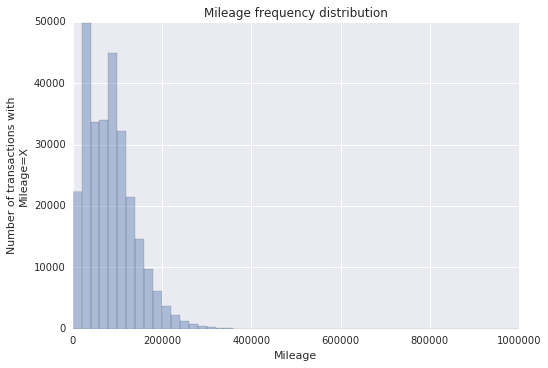

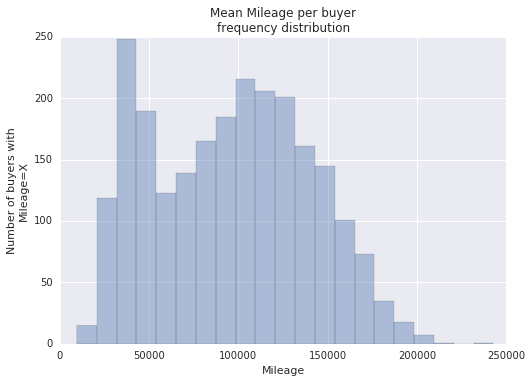

################################################################################
Feature: SalePrice


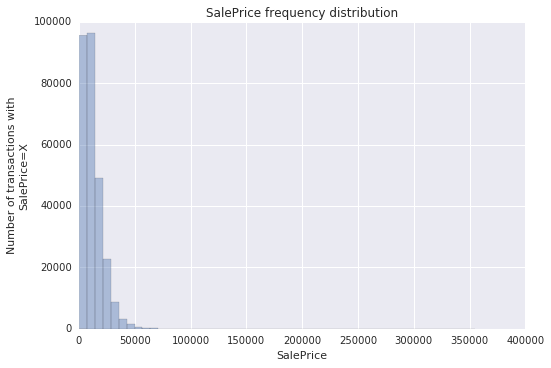

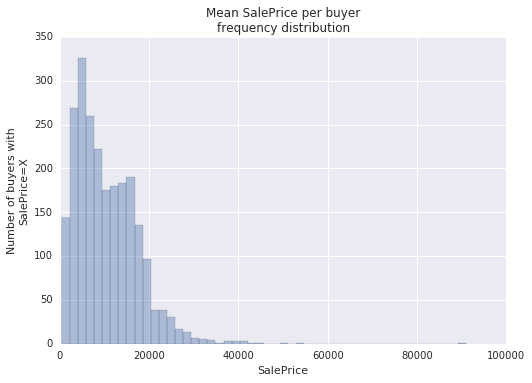

################################################################################
Feature: CarYear


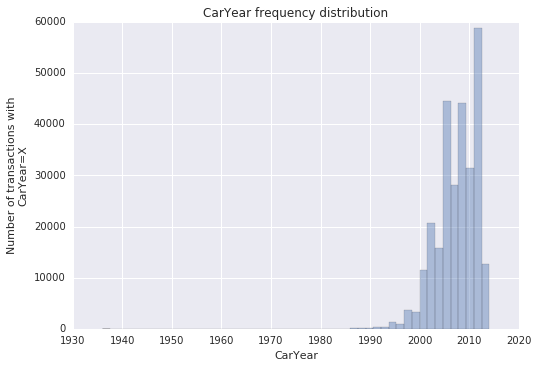

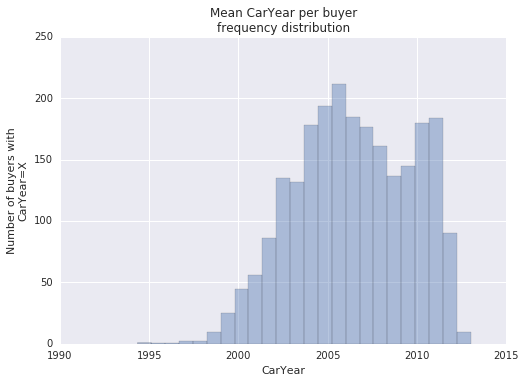

################################################################################
Feature: MMR


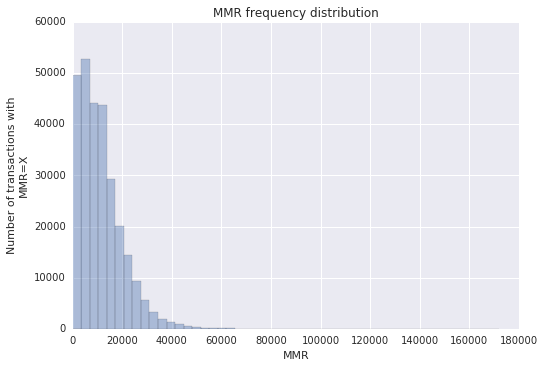

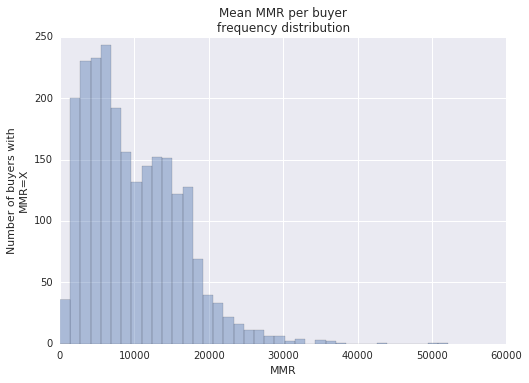

################################################################################
Feature: LIGHTG


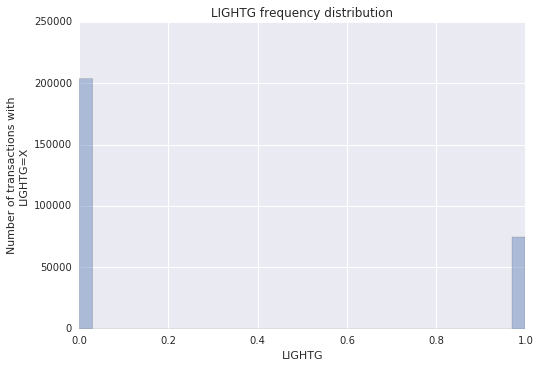

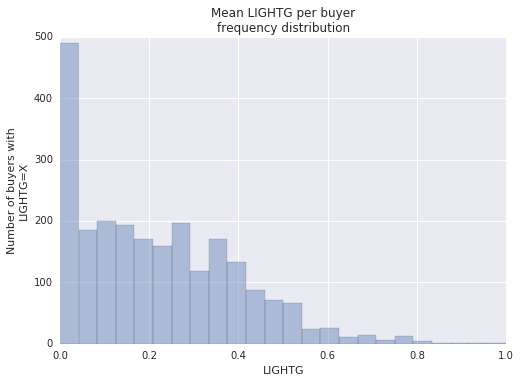

################################################################################
Feature: LIGHTY


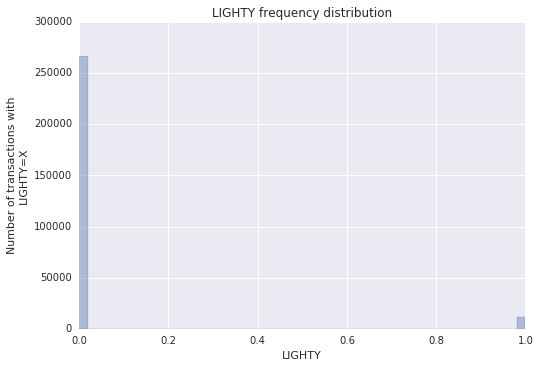

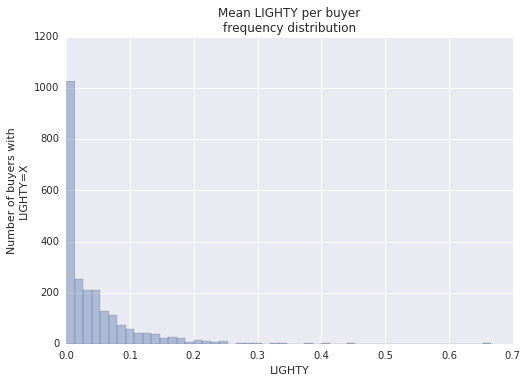

################################################################################
Feature: LIGHTR


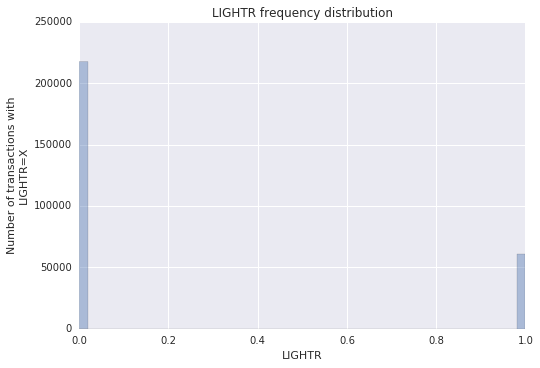

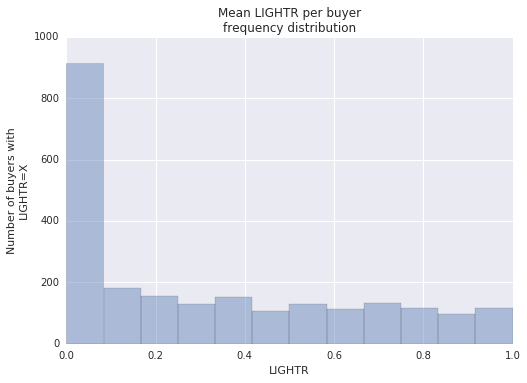

################################################################################
Feature: PSI


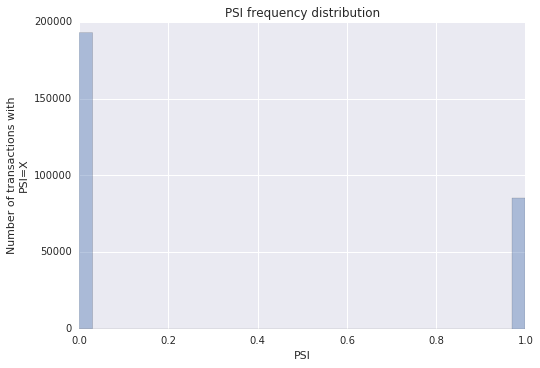

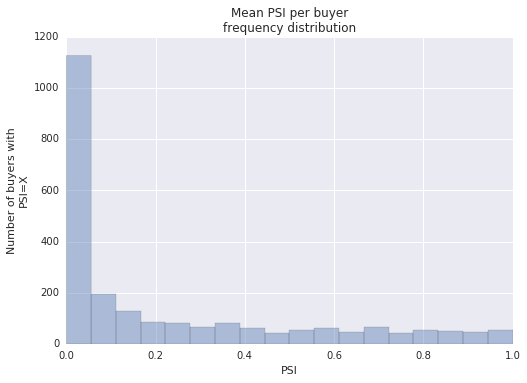

################################################################################
Feature: Arbitrated


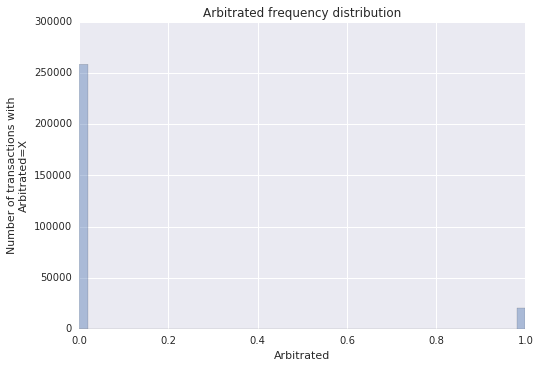

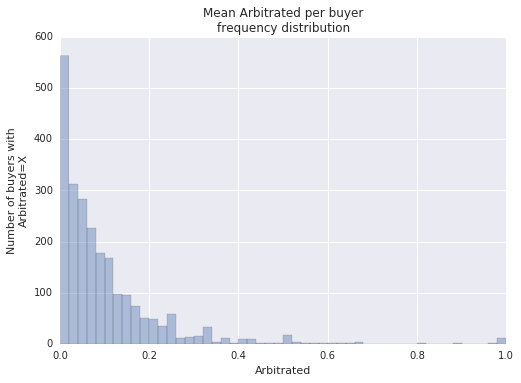

################################################################################
Feature: Salvage


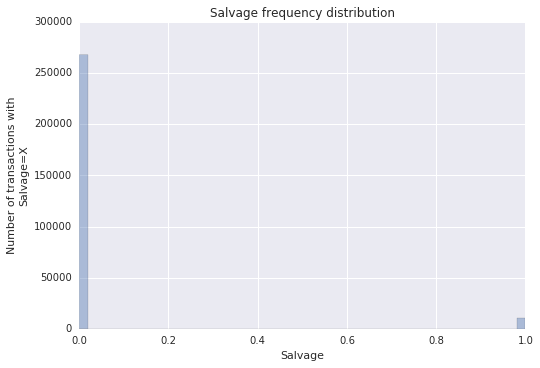

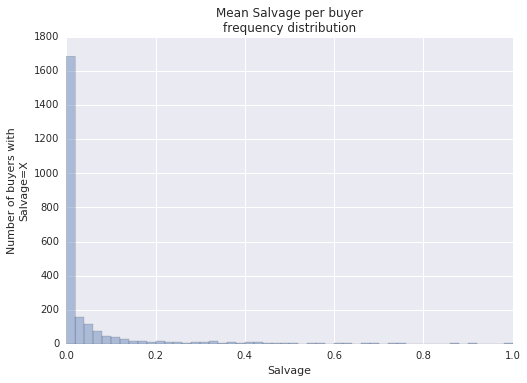

################################################################################
Feature: OVE


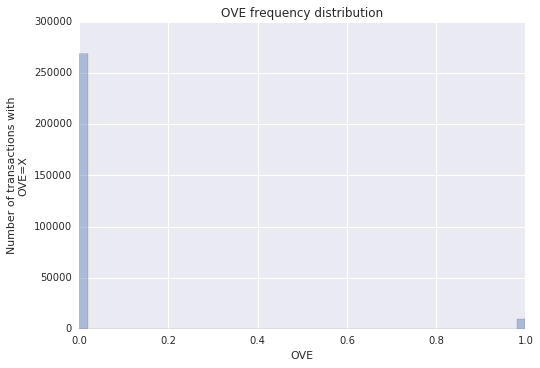

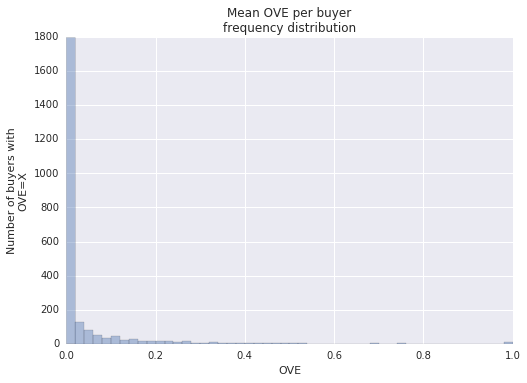

################################################################################
Feature: Simulcast


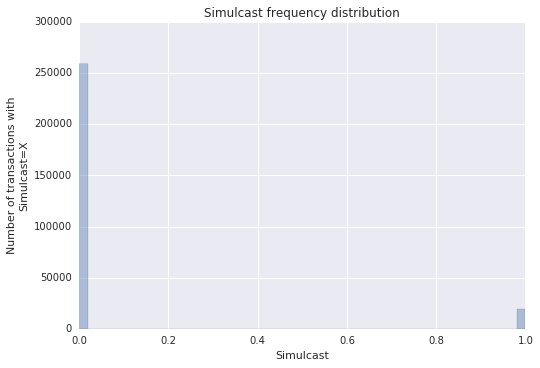

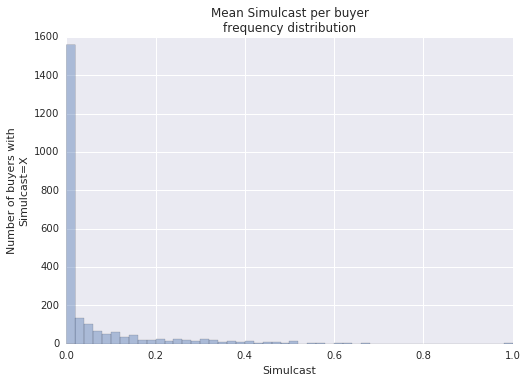

################################################################################
Feature: InLane


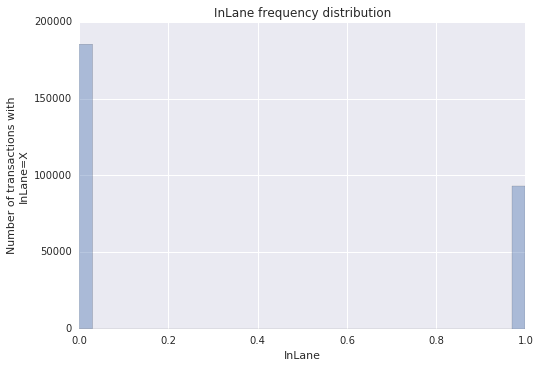

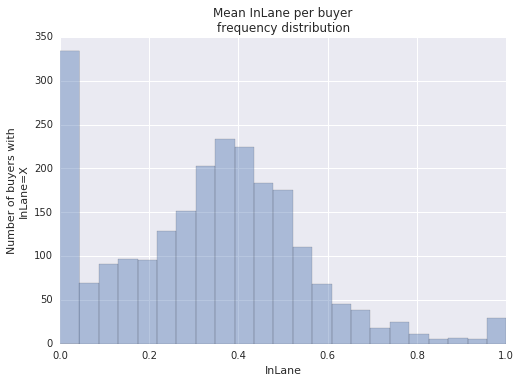

################################################################################
Feature: PSIEligible


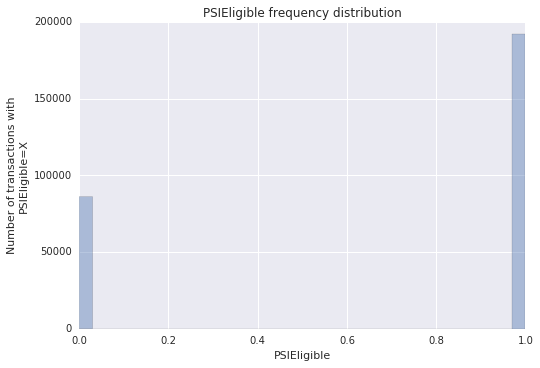

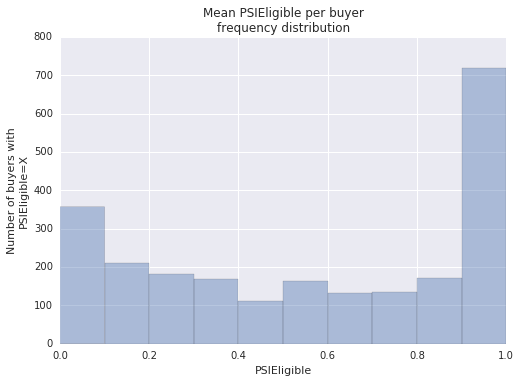

################################################################################
Feature: Autocheck_score


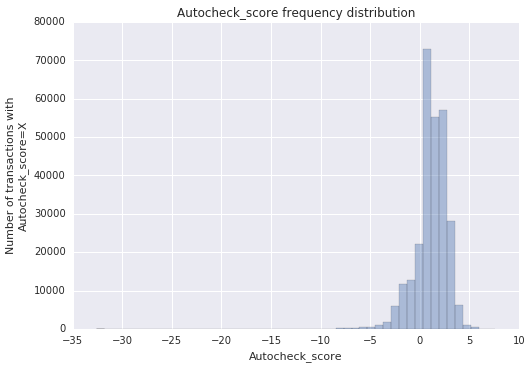

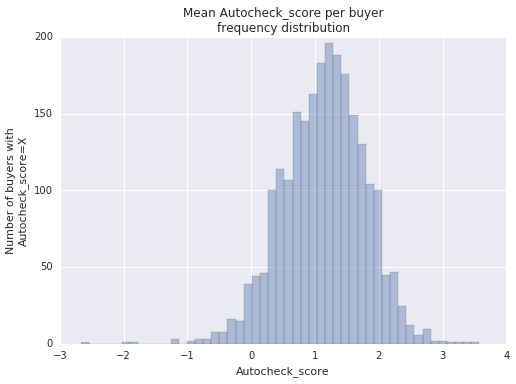

################################################################################
Feature: ConditionReport


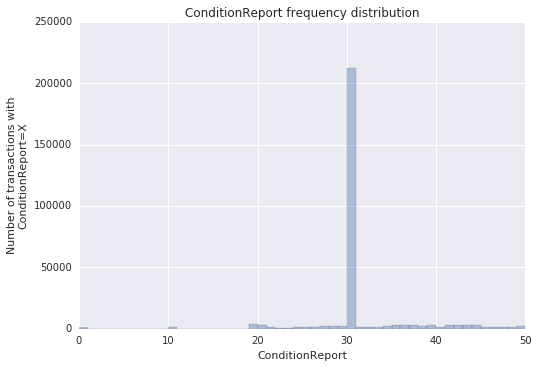

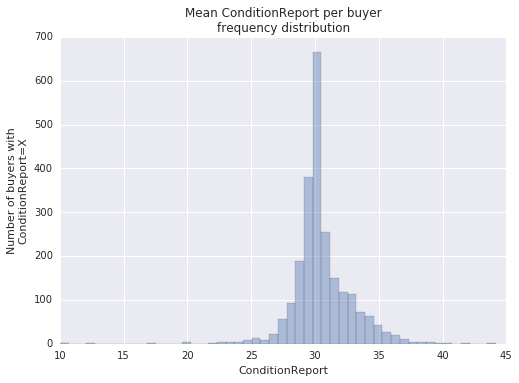

################################################################################
Feature: DSEligible


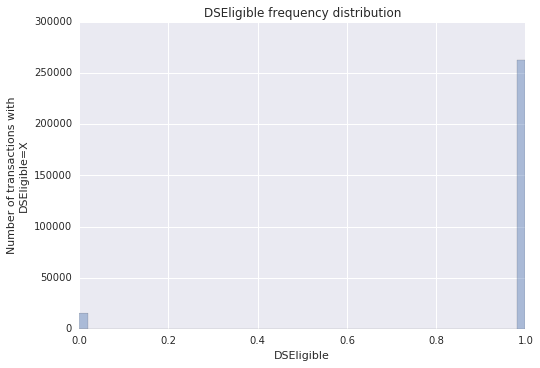

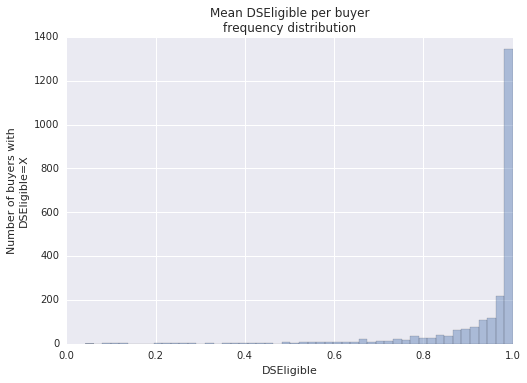

################################################################################
Feature: Returned


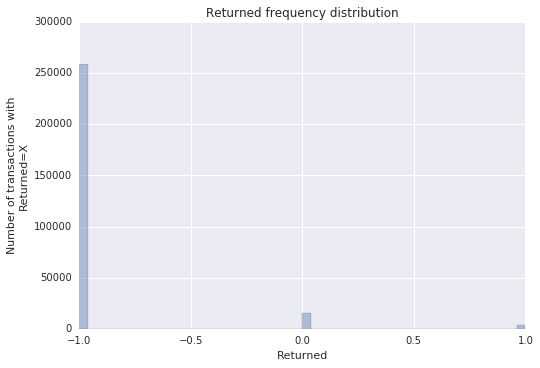

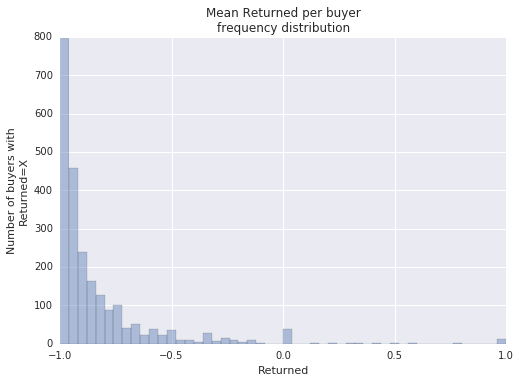

################################################################################
Feature: SellingLocation_lat


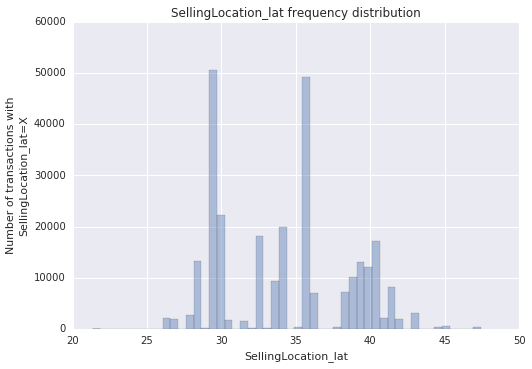

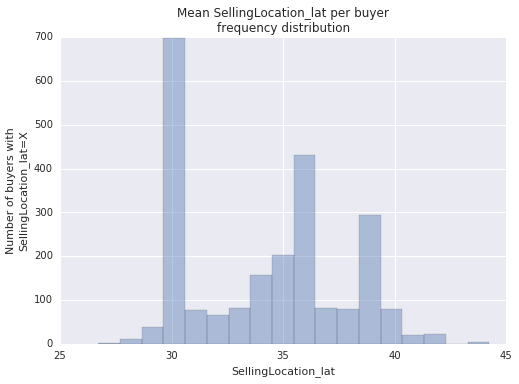

################################################################################
Feature: SellingLocation_lon


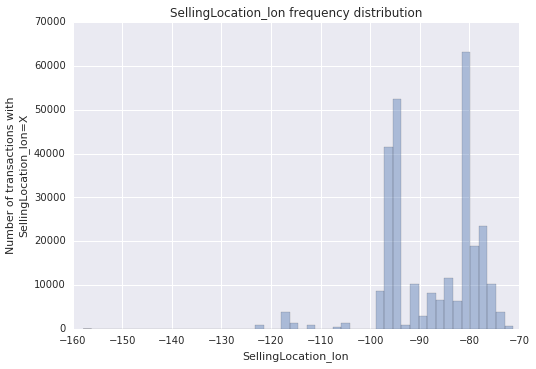

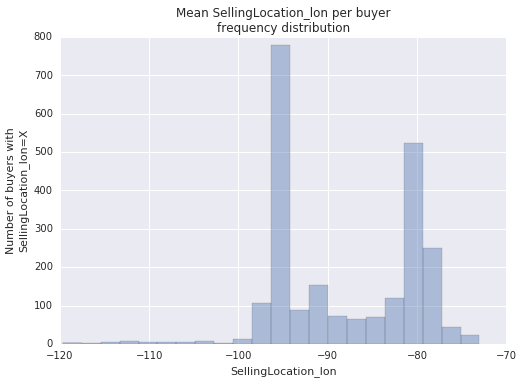

################################################################################
Feature: JDPowersCat_COMPACTCAR


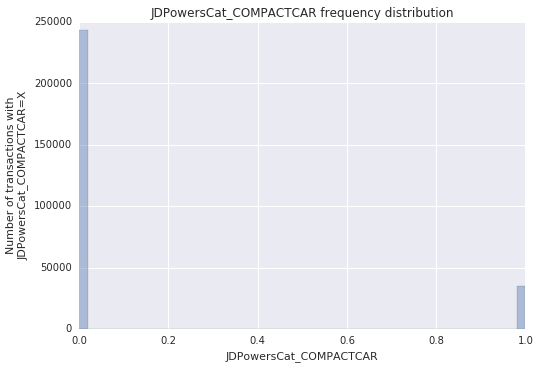

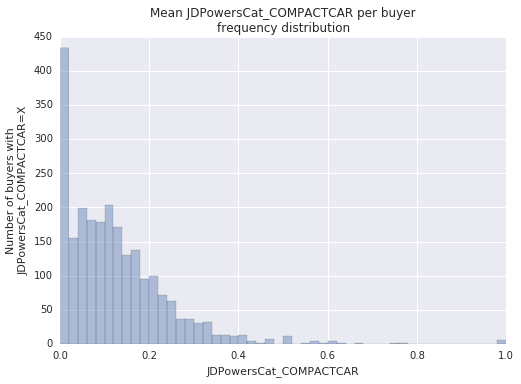

################################################################################
Feature: JDPowersCat_EXCLUDED


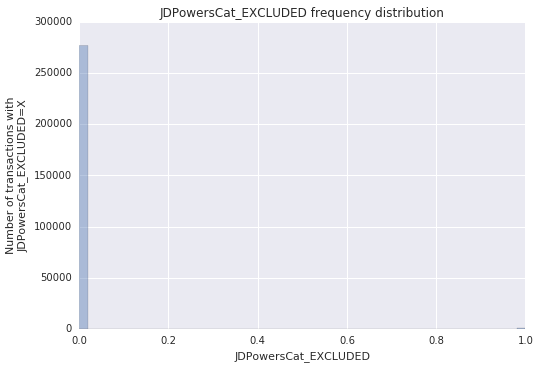

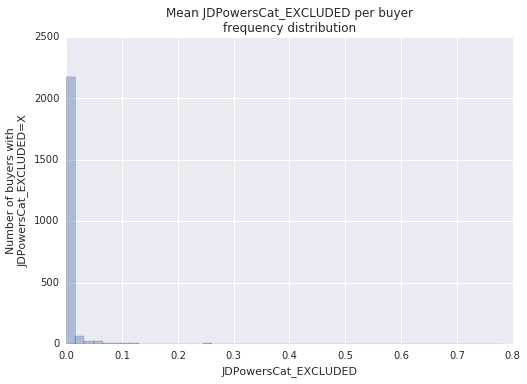

################################################################################
Feature: JDPowersCat_FULLSIZECAR


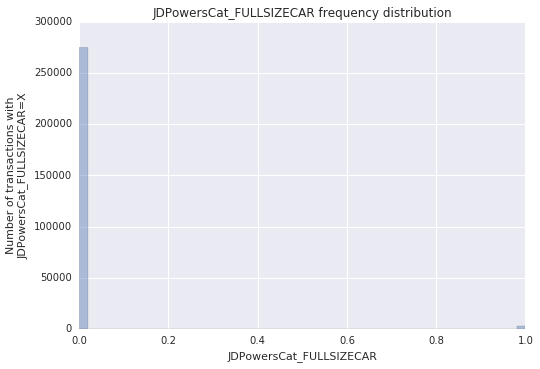

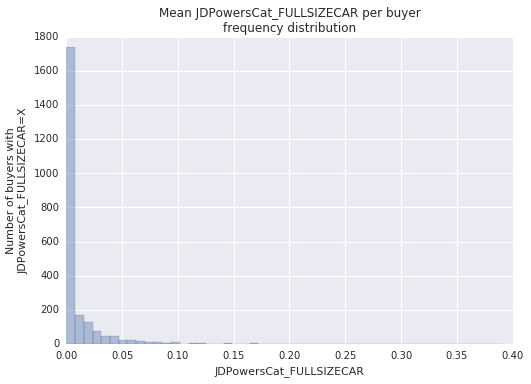

################################################################################
Feature: JDPowersCat_LUXURYCAR


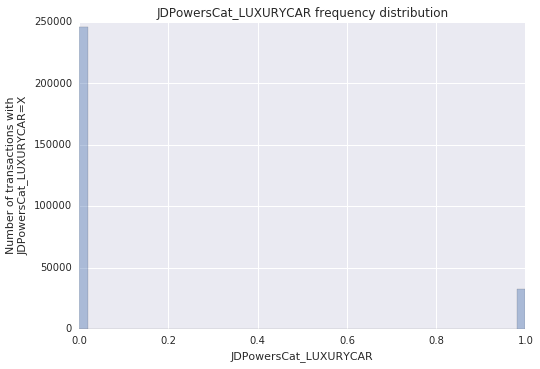

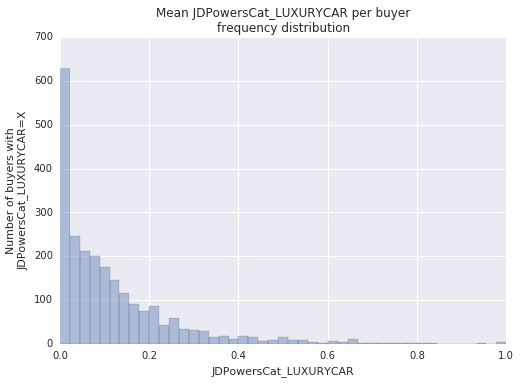

################################################################################
Feature: JDPowersCat_MIDSIZECAR


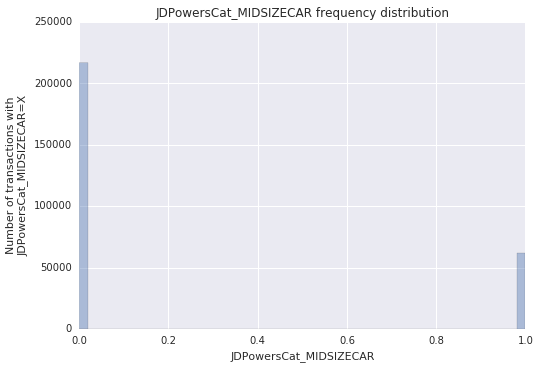

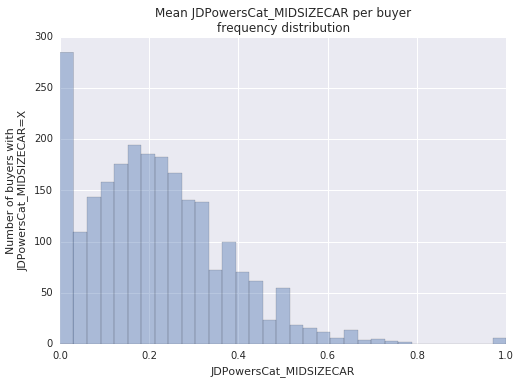

################################################################################
Feature: JDPowersCat_PICKUP


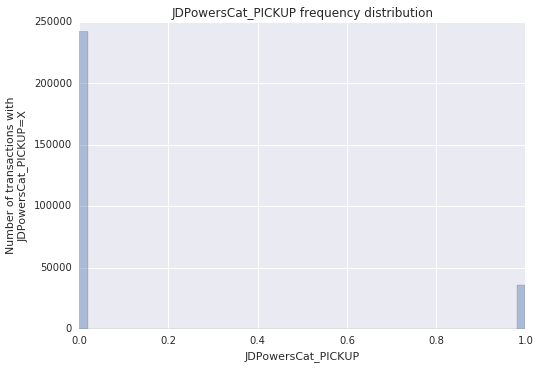

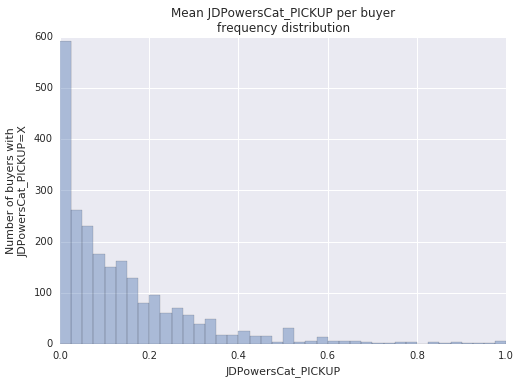

################################################################################
Feature: JDPowersCat_SPORTSCAR


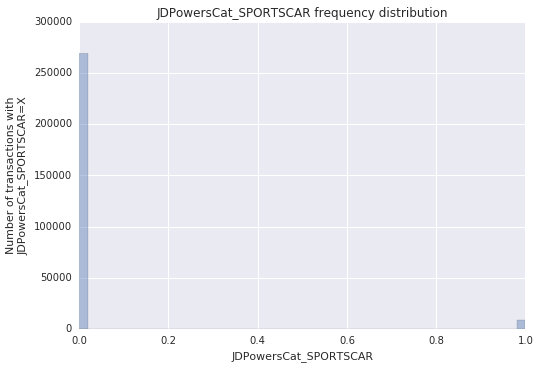

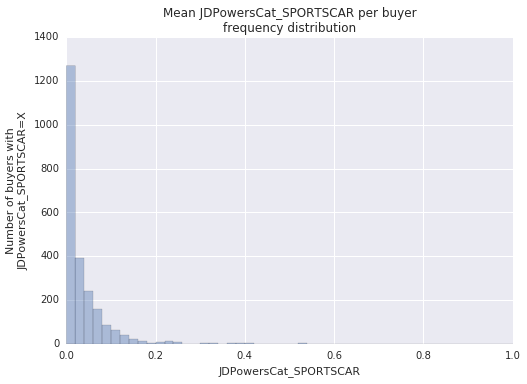

################################################################################
Feature: JDPowersCat_SUV


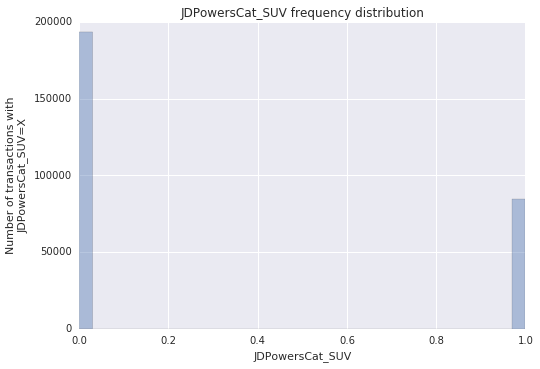

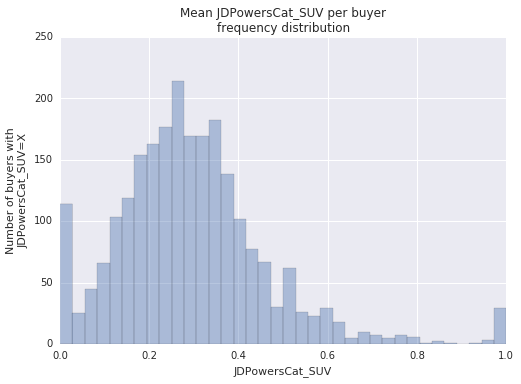

################################################################################
Feature: JDPowersCat_UNKNOWN


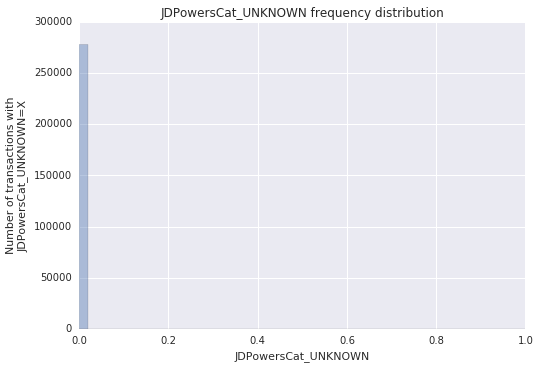

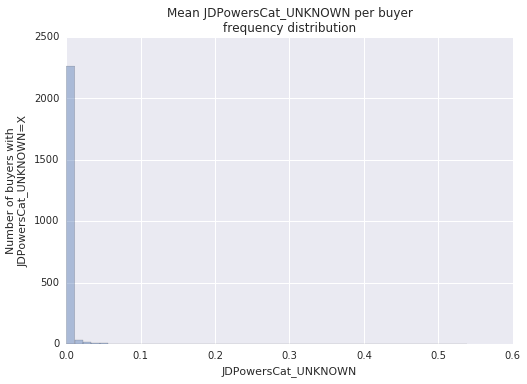

################################################################################
Feature: JDPowersCat_VAN


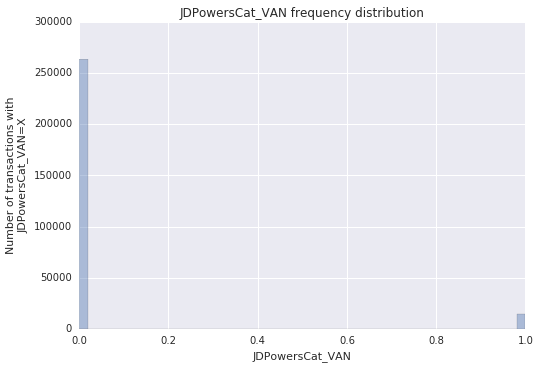

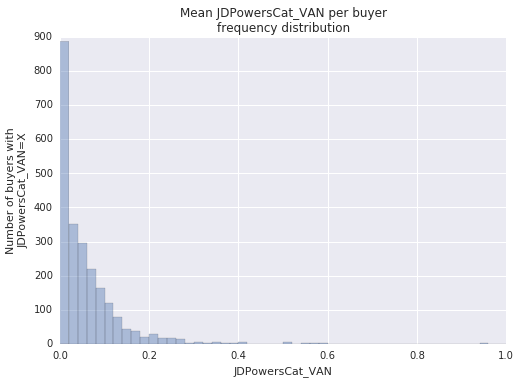

################################################################################
Feature: LIGHT_G1Y2R3


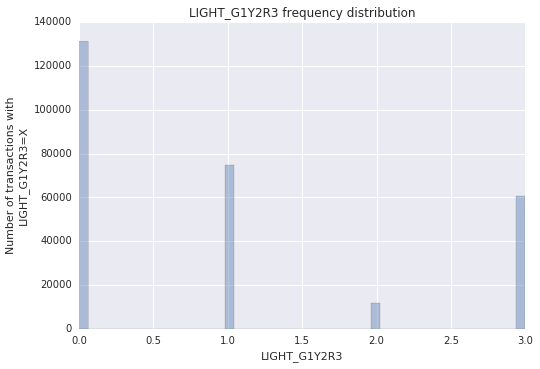

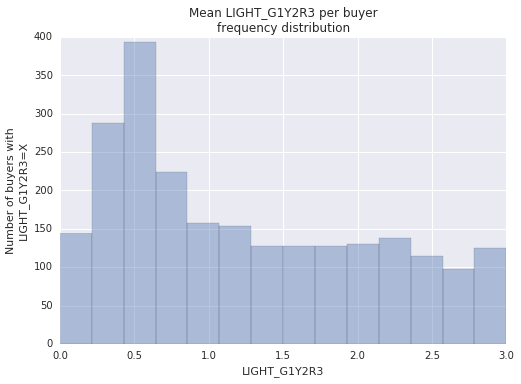

################################################################################
Feature: SaleDate_dow


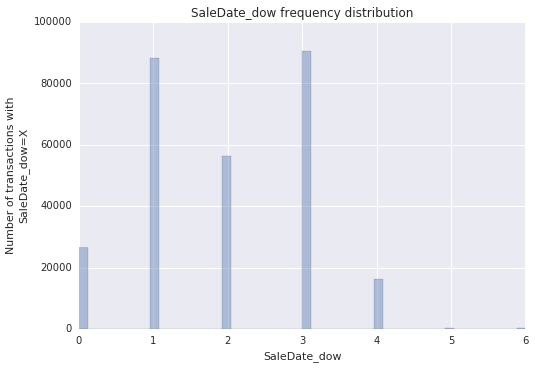

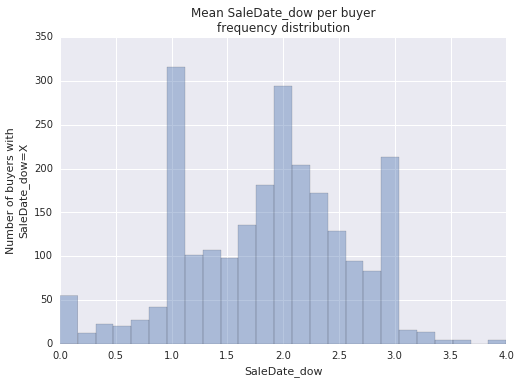

################################################################################
Feature: SaleDate_doy


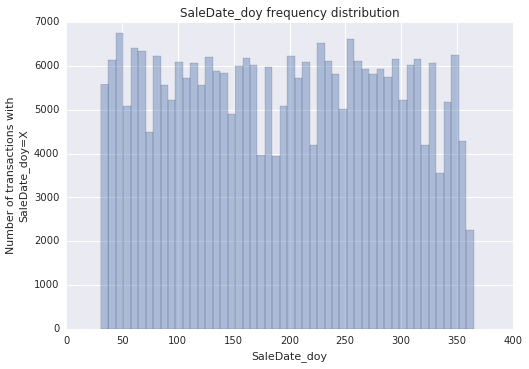

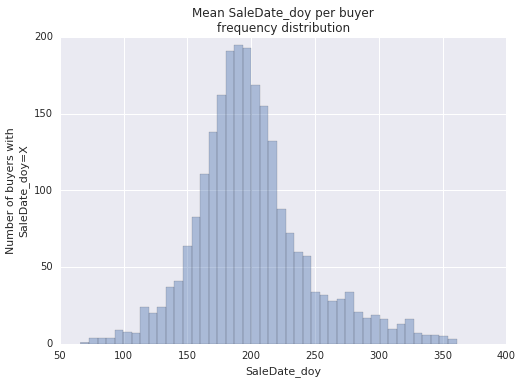

################################################################################
Feature: SaleDate_day


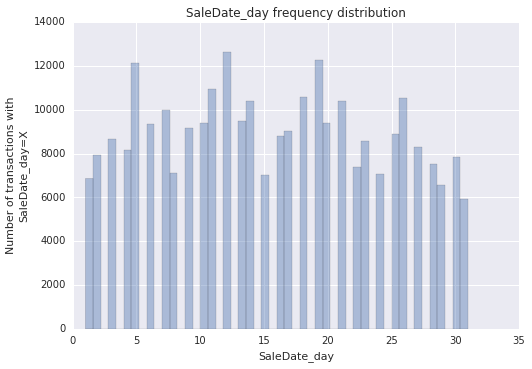

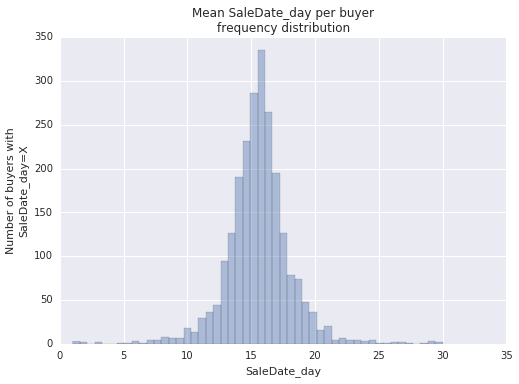

################################################################################
Feature: SaleDate_decyear


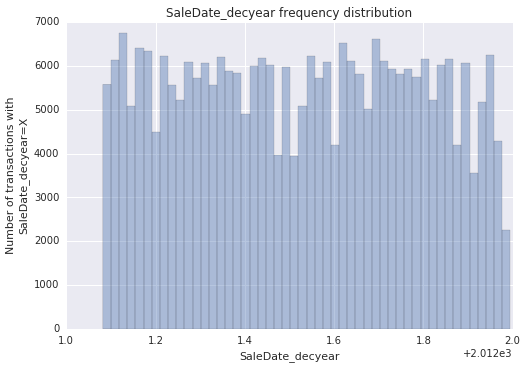

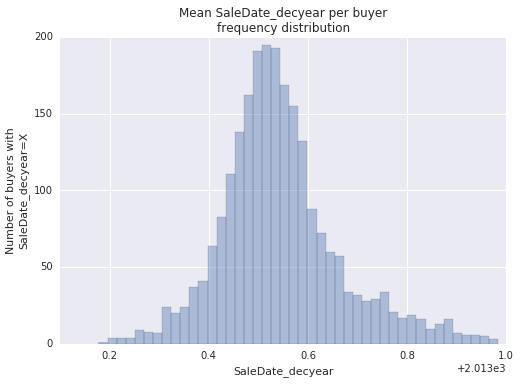

################################################################################
Feature: BuyerID_numTransactions


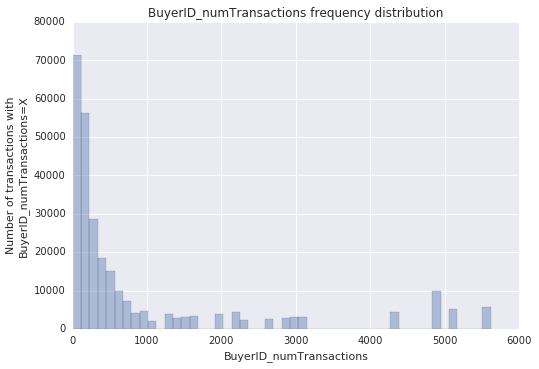

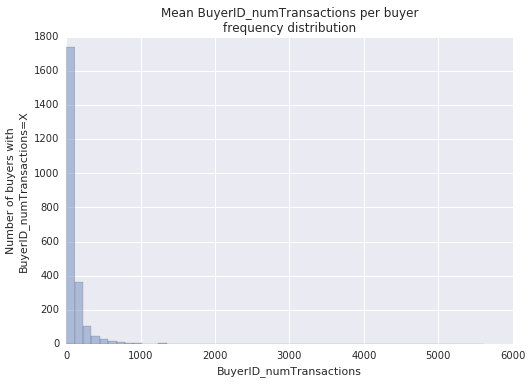

################################################################################
Feature: BuyerID_numDSEligible1


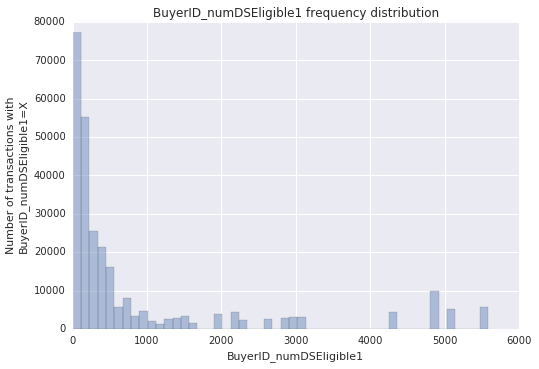

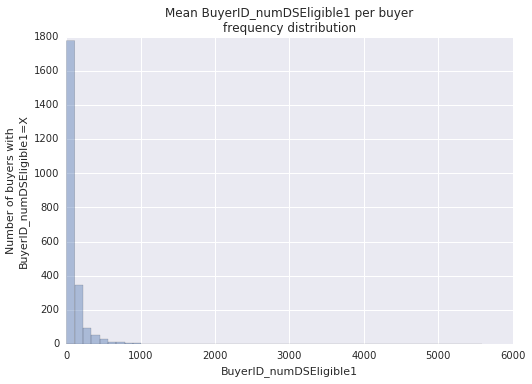

################################################################################
Feature: BuyerID_numReturnedNotNull


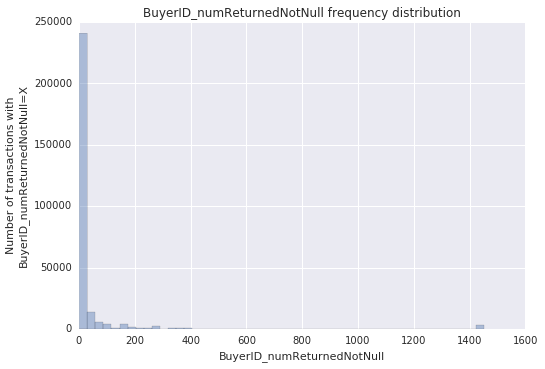

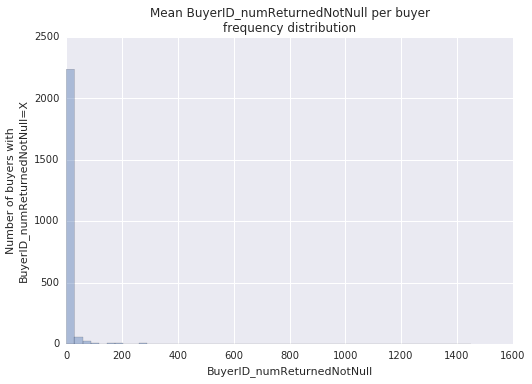

################################################################################
Feature: BuyerID_numReturned1


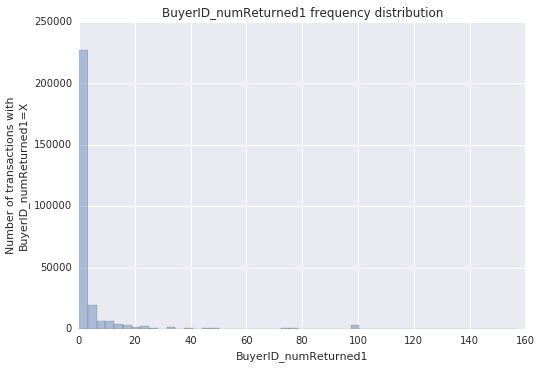

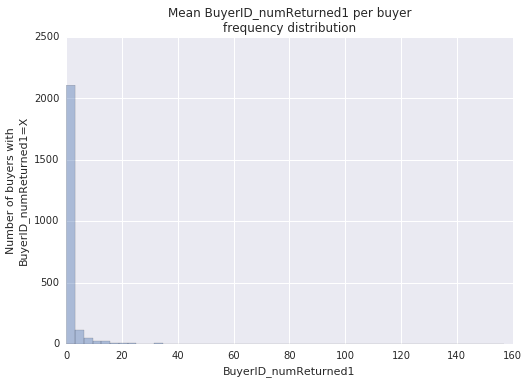

################################################################################
Feature: BuyerID_fracDSEligible1DivTransactions


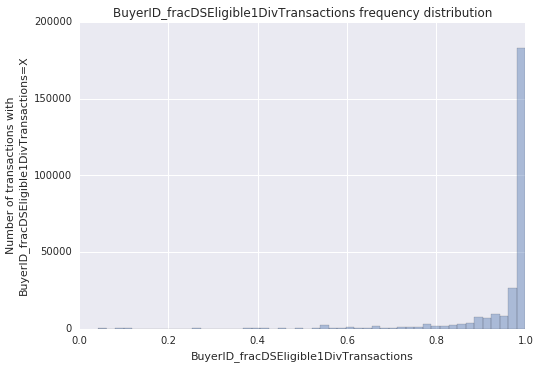

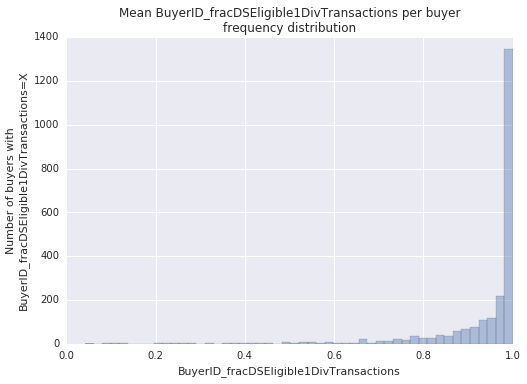

################################################################################
Feature: BuyerID_fracReturnedNotNullDivDSEligible1


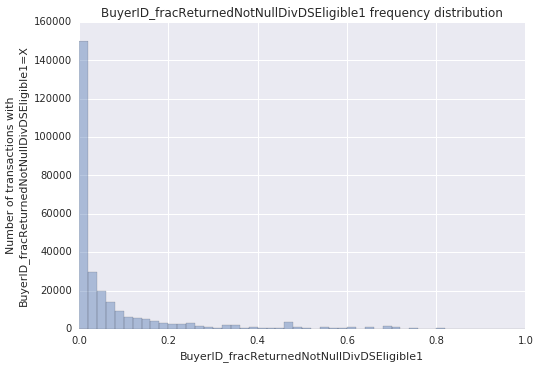

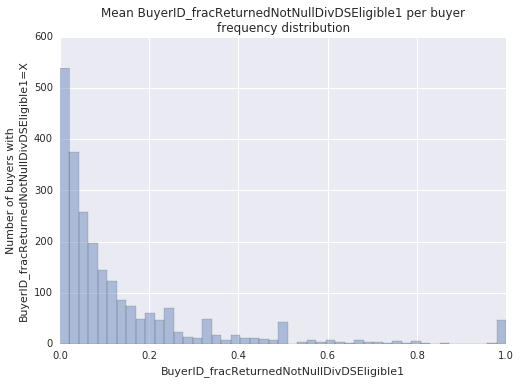

################################################################################
Feature: BuyerID_fracReturned1DivReturnedNotNull


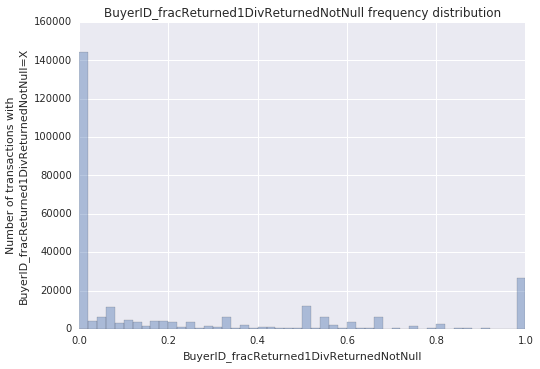

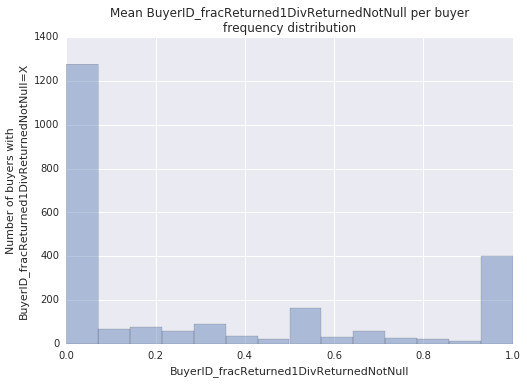

################################################################################
Feature: SellerID_numTransactions


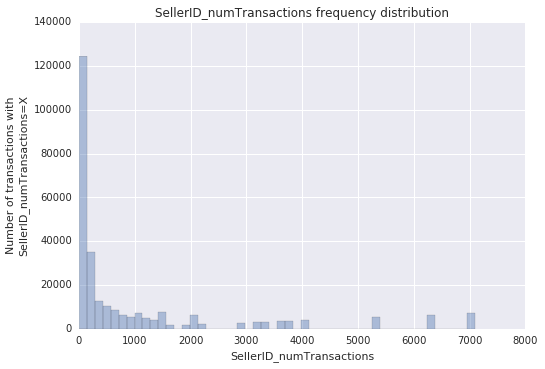

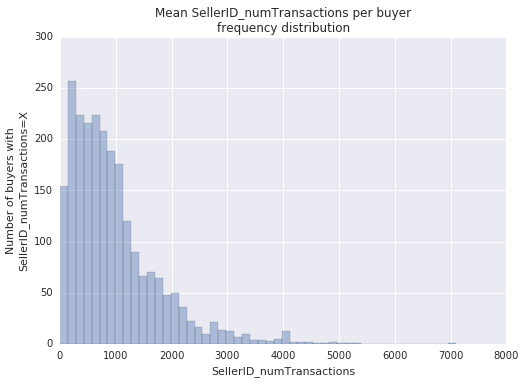

################################################################################
Feature: SellerID_numDSEligible1


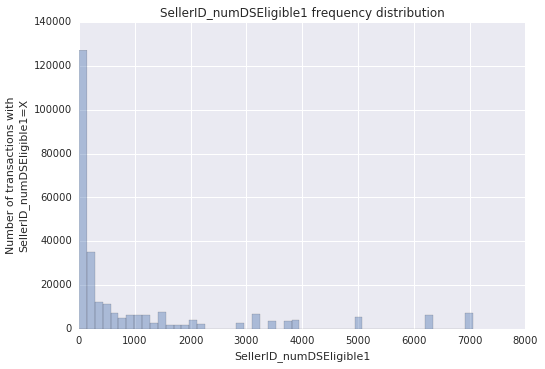

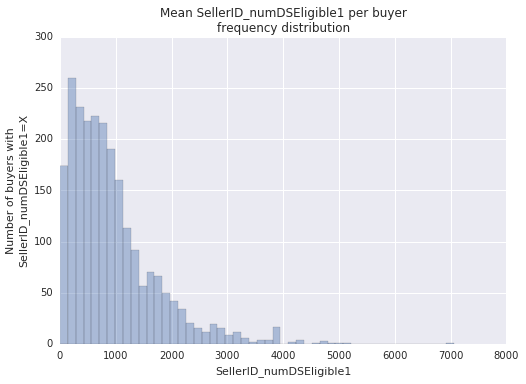

################################################################################
Feature: SellerID_numReturnedNotNull


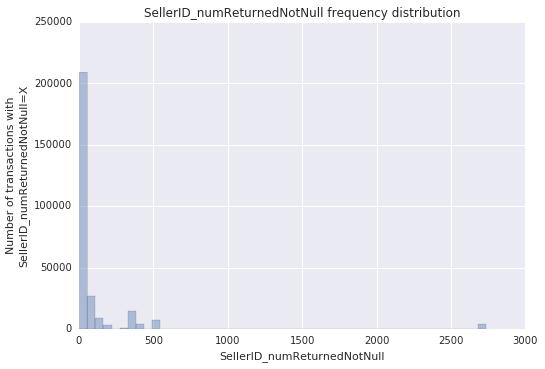

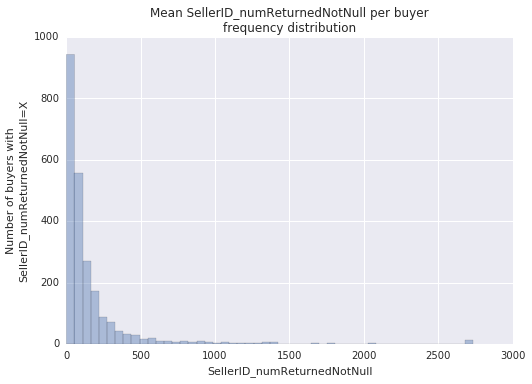

################################################################################
Feature: SellerID_numReturned1


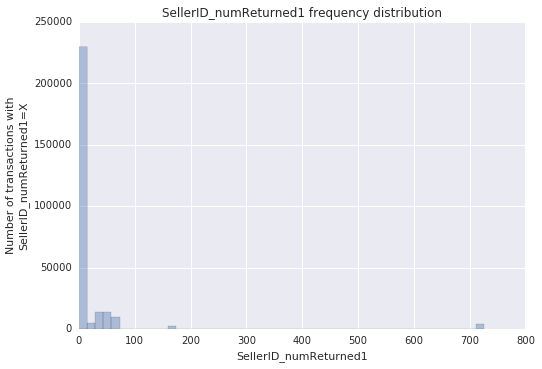

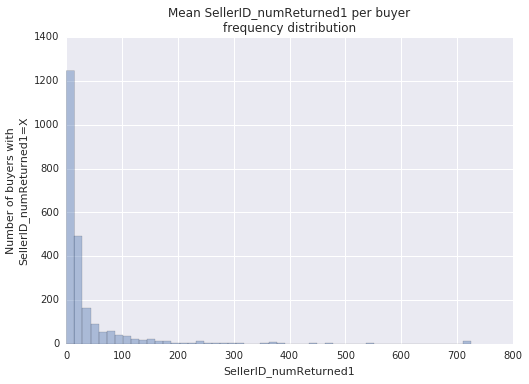

################################################################################
Feature: SellerID_fracDSEligible1DivTransactions


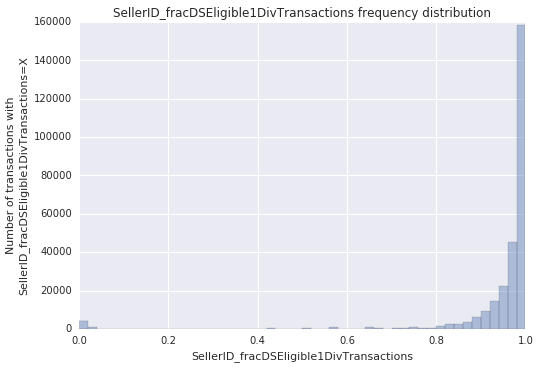

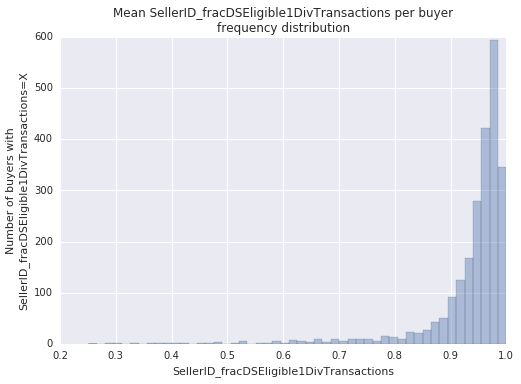

################################################################################
Feature: SellerID_fracReturnedNotNullDivDSEligible1


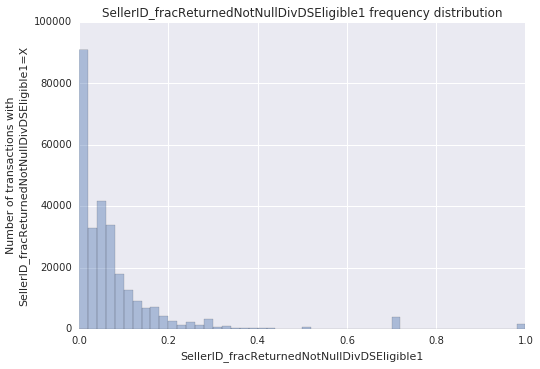

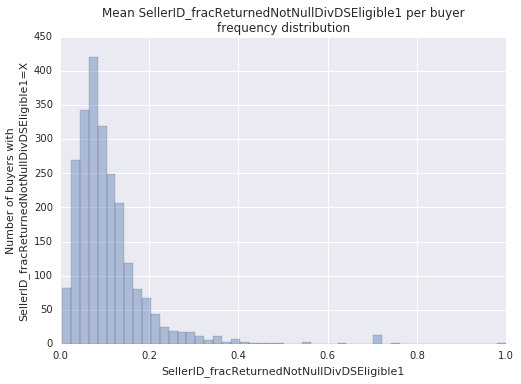

################################################################################
Feature: SellerID_fracReturned1DivReturnedNotNull


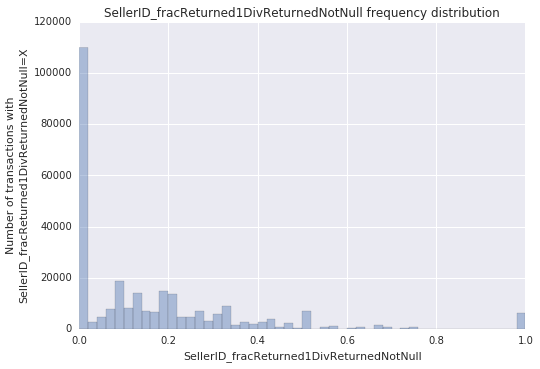

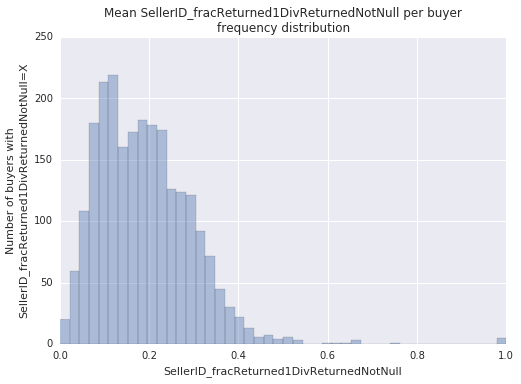

################################################################################
Feature: VIN_numTransactions


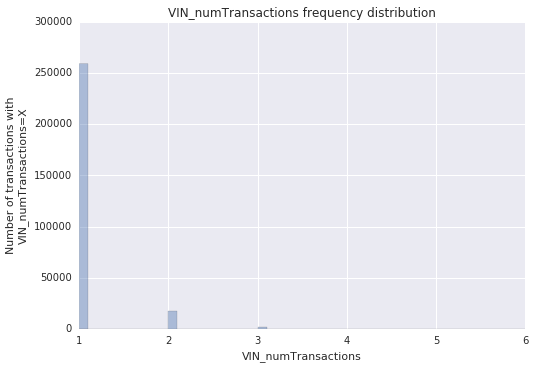

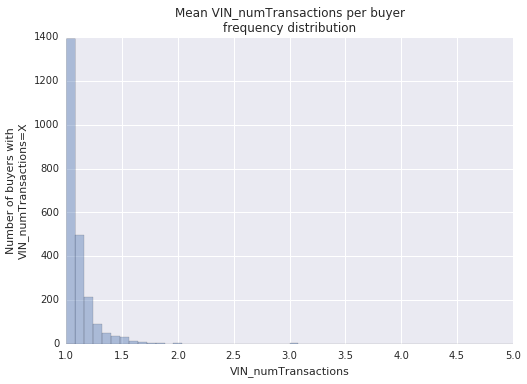

################################################################################
Feature: VIN_numDSEligible1


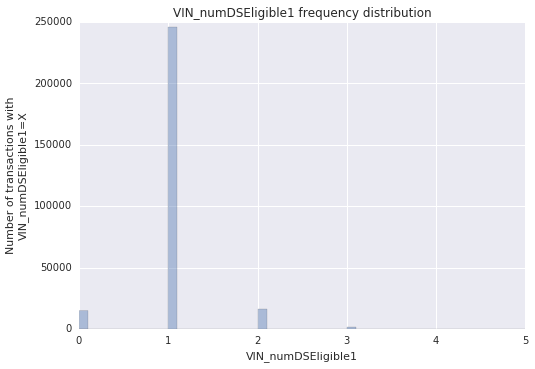

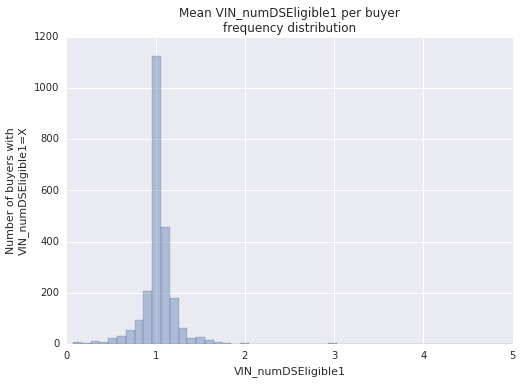

################################################################################
Feature: VIN_numReturnedNotNull


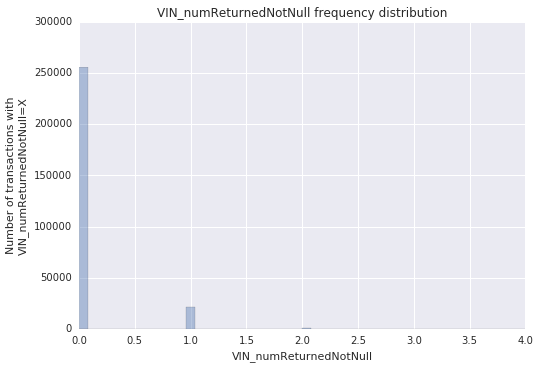

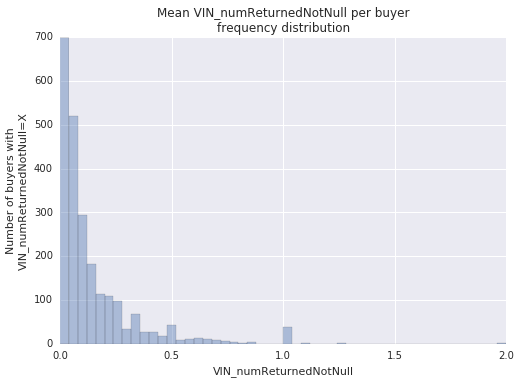

################################################################################
Feature: VIN_numReturned1


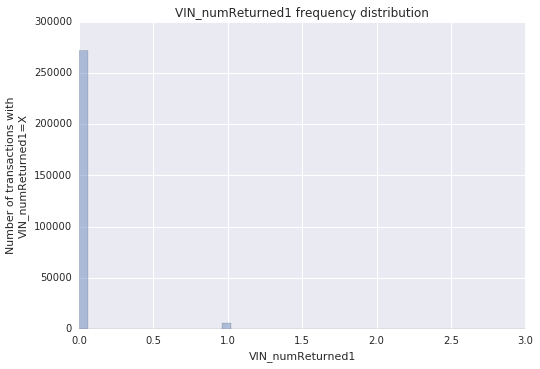

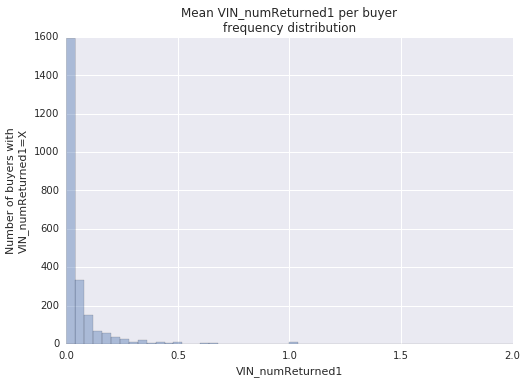

################################################################################
Feature: VIN_fracDSEligible1DivTransactions


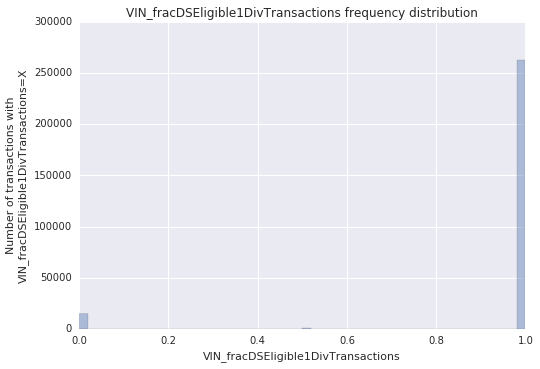

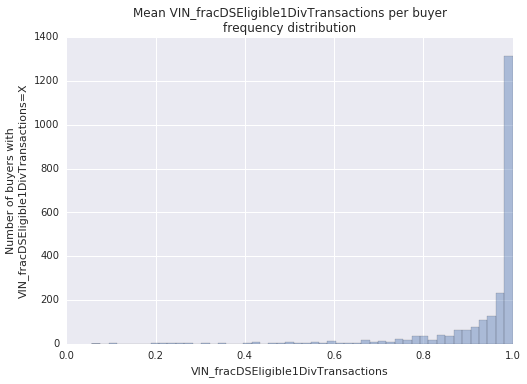

################################################################################
Feature: VIN_fracReturnedNotNullDivDSEligible1


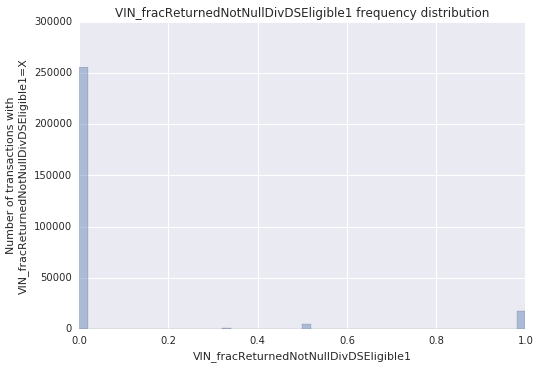

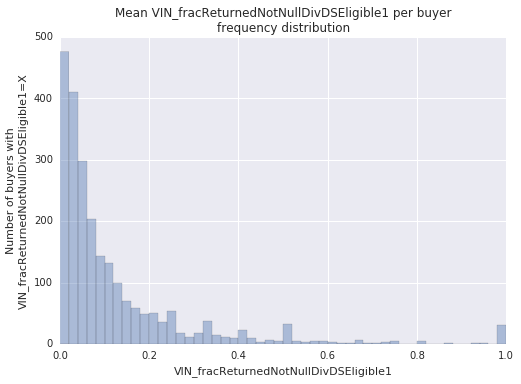

################################################################################
Feature: VIN_fracReturned1DivReturnedNotNull


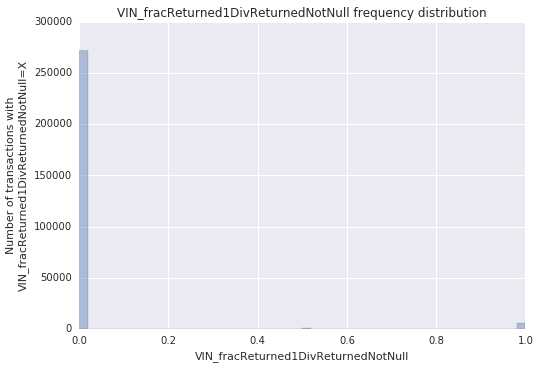

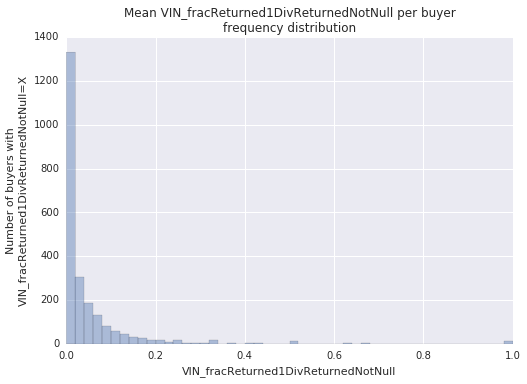

################################################################################
Feature: SellingLocation_numTransactions


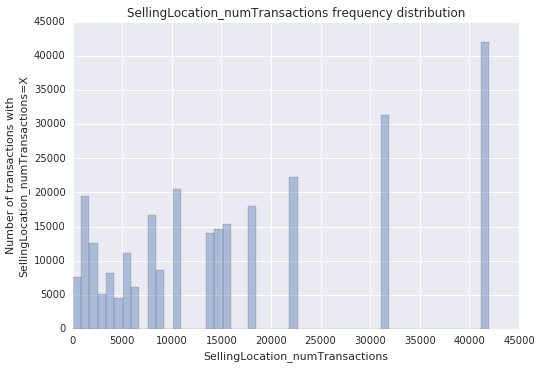

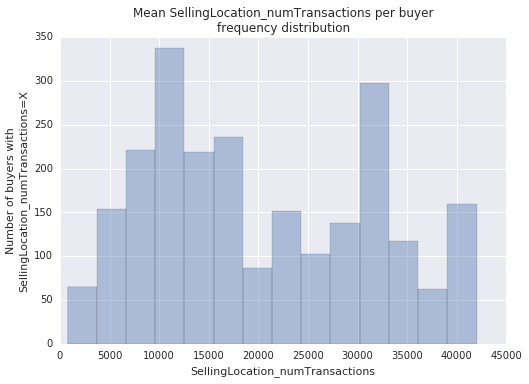

################################################################################
Feature: SellingLocation_numDSEligible1


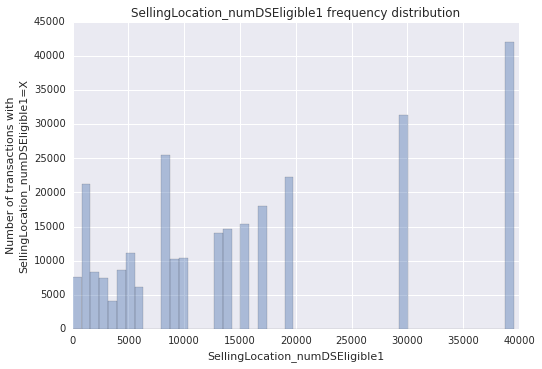

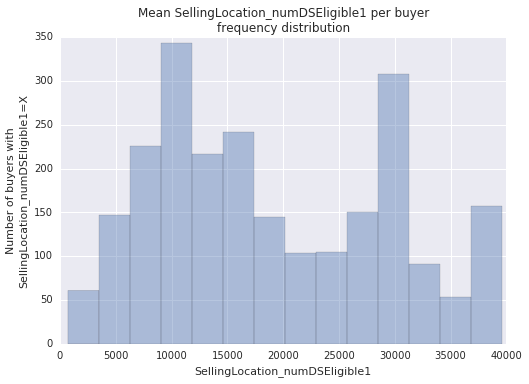

################################################################################
Feature: SellingLocation_numReturnedNotNull


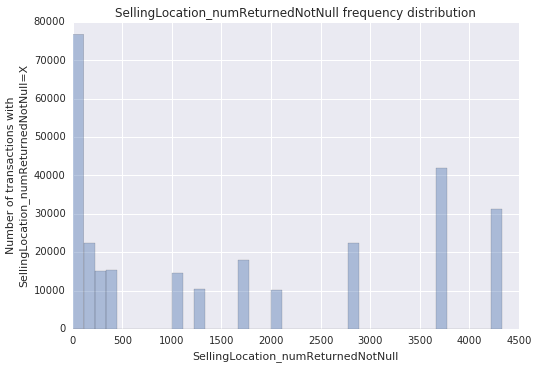

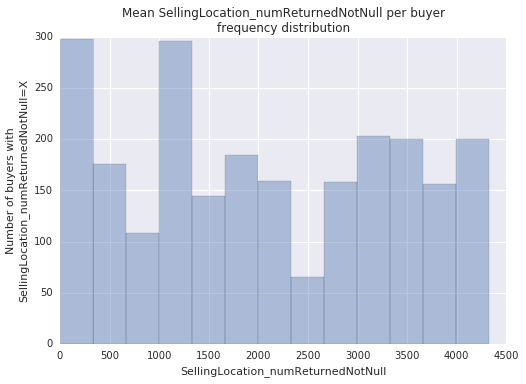

################################################################################
Feature: SellingLocation_numReturned1


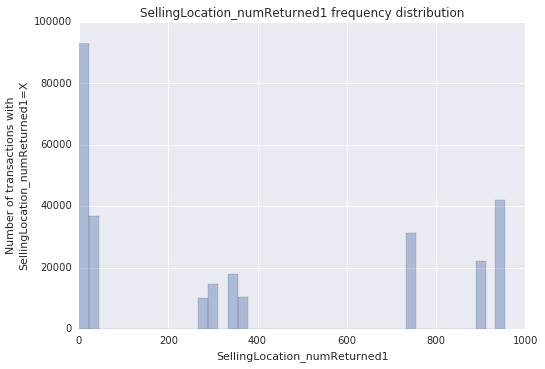

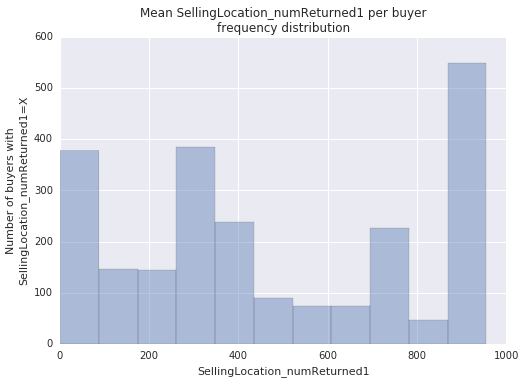

################################################################################
Feature: SellingLocation_fracDSEligible1DivTransactions


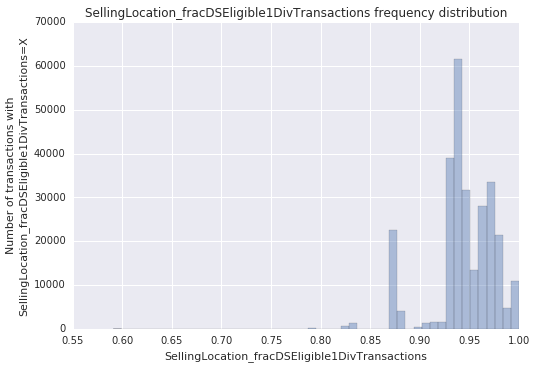

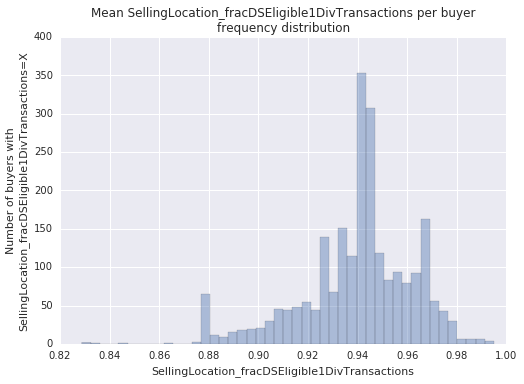

################################################################################
Feature: SellingLocation_fracReturnedNotNullDivDSEligible1


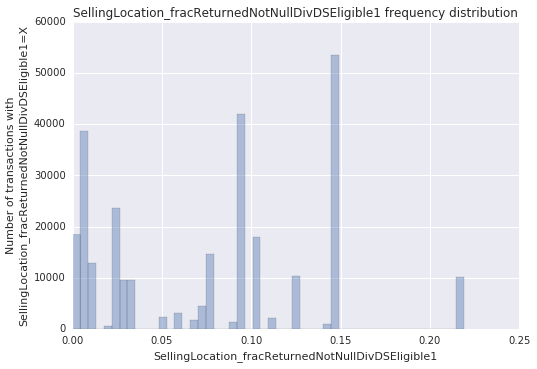

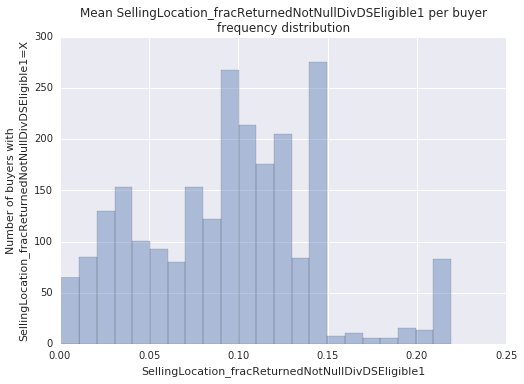

################################################################################
Feature: SellingLocation_fracReturned1DivReturnedNotNull


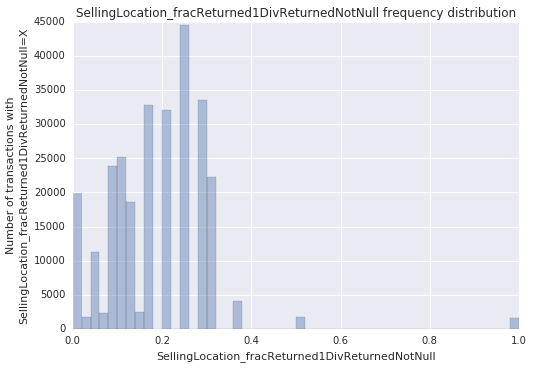

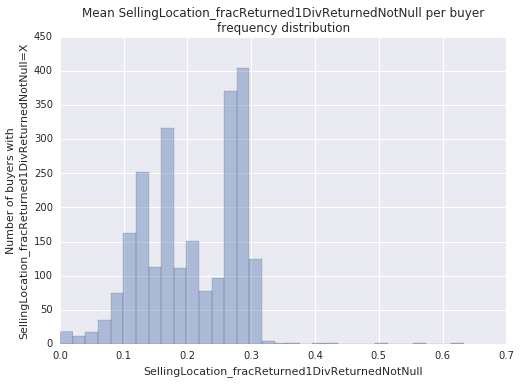

################################################################################
Feature: CarMake_numTransactions


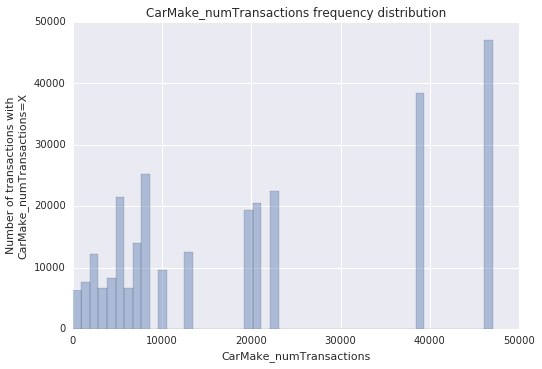

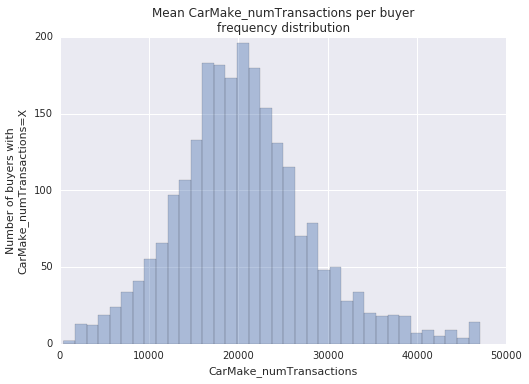

################################################################################
Feature: CarMake_numDSEligible1


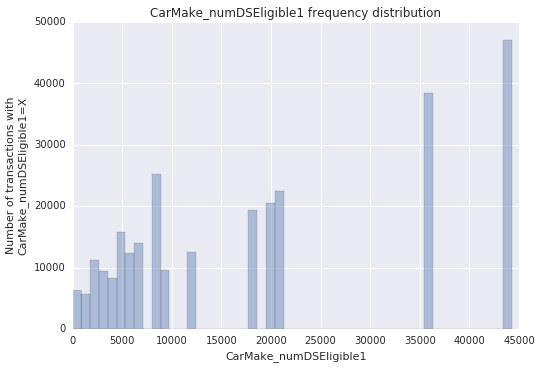

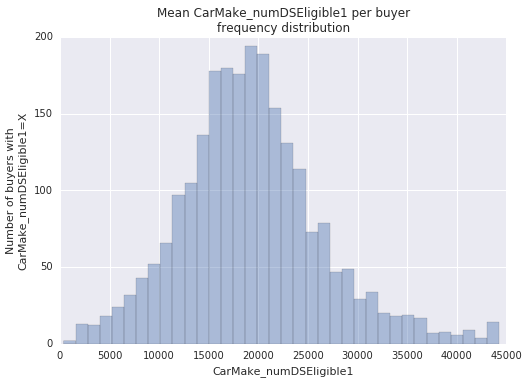

################################################################################
Feature: CarMake_numReturnedNotNull


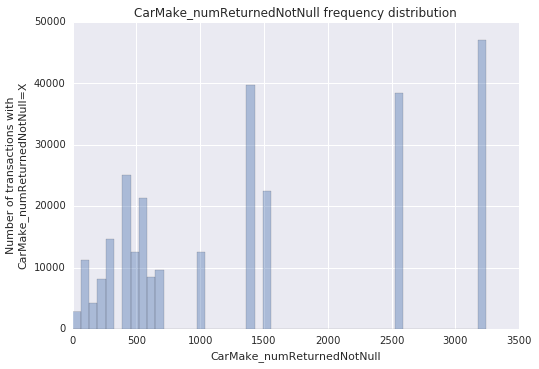

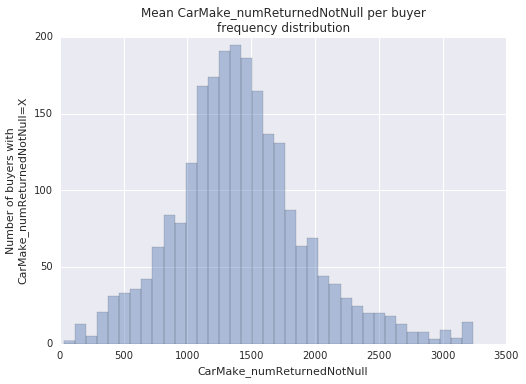

################################################################################
Feature: CarMake_numReturned1


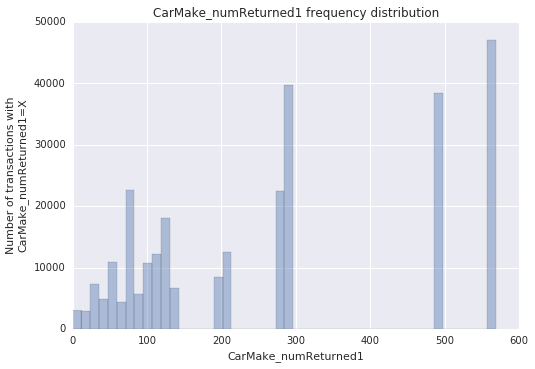

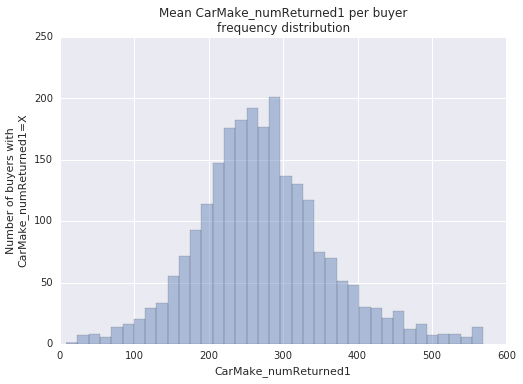

################################################################################
Feature: CarMake_fracDSEligible1DivTransactions


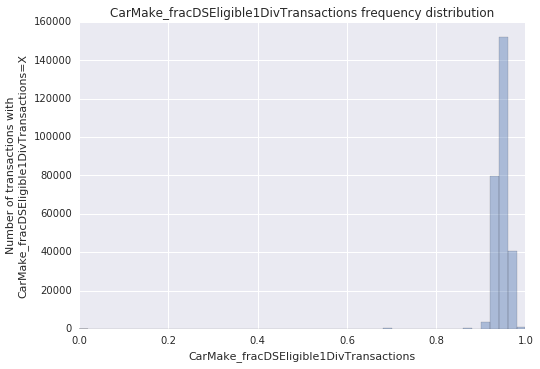

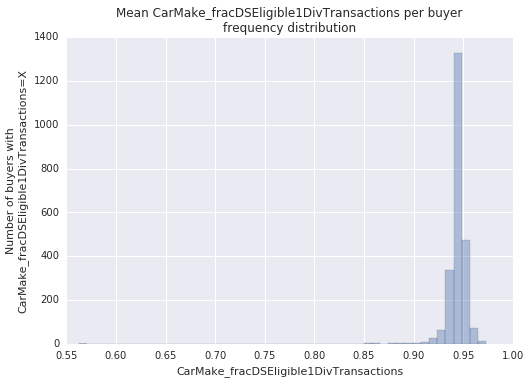

################################################################################
Feature: CarMake_fracReturnedNotNullDivDSEligible1


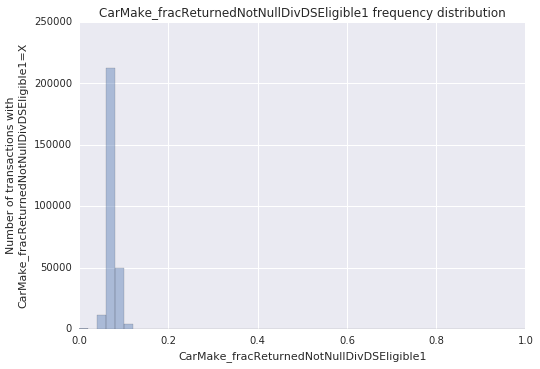

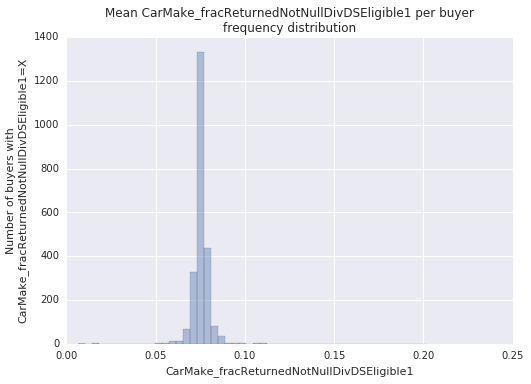

################################################################################
Feature: CarMake_fracReturned1DivReturnedNotNull


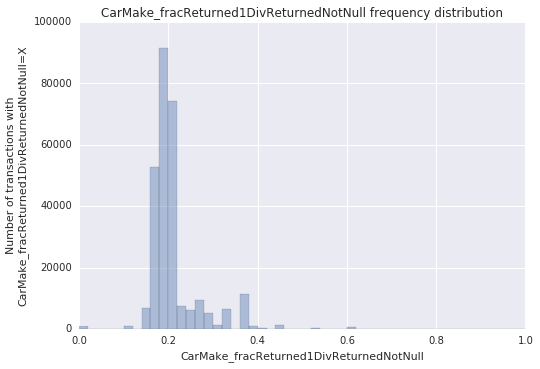

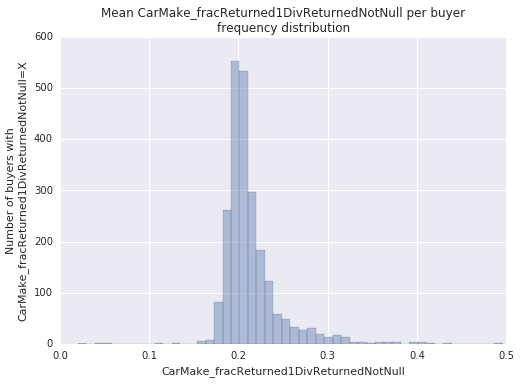

################################################################################
Feature: JDPowersCat_numTransactions


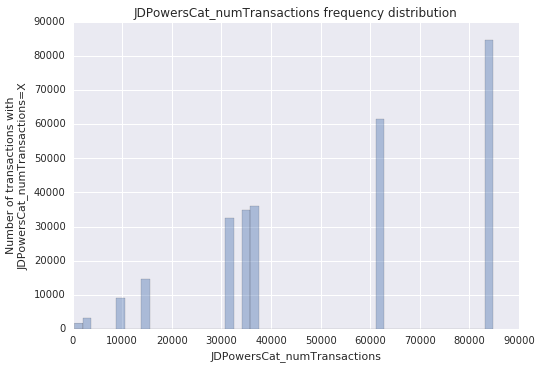

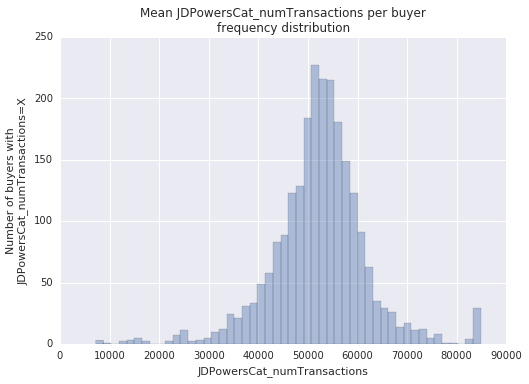

################################################################################
Feature: JDPowersCat_numDSEligible1


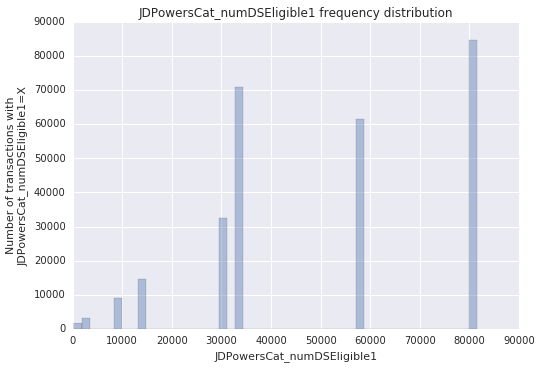

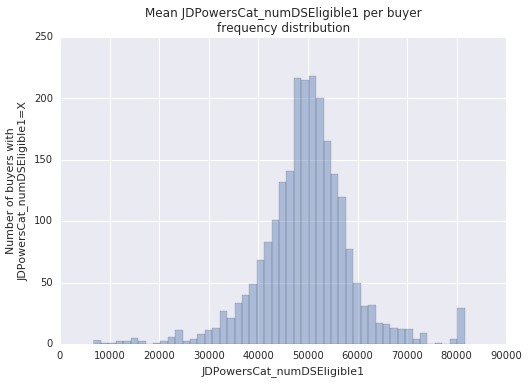

################################################################################
Feature: JDPowersCat_numReturnedNotNull


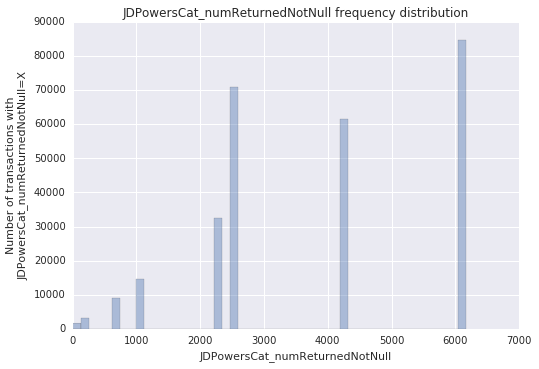

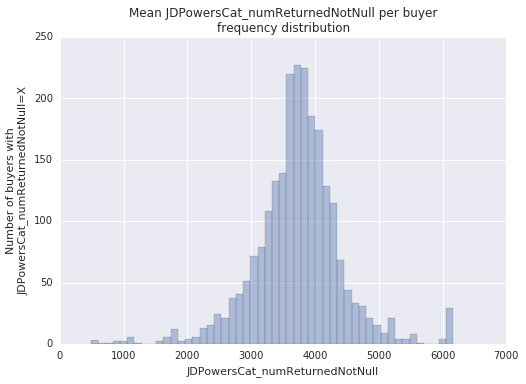

################################################################################
Feature: JDPowersCat_numReturned1


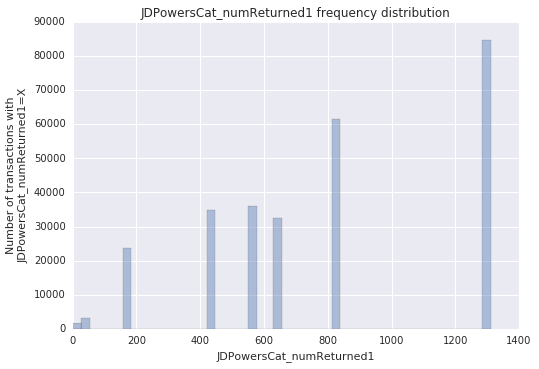

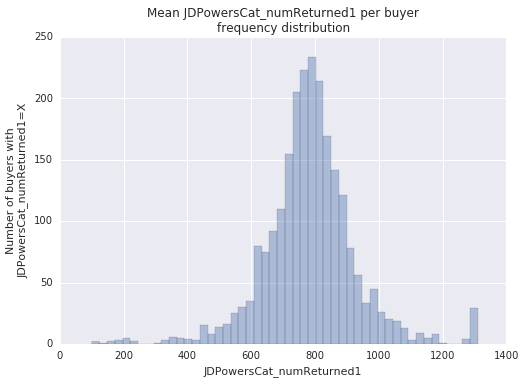

################################################################################
Feature: JDPowersCat_fracDSEligible1DivTransactions


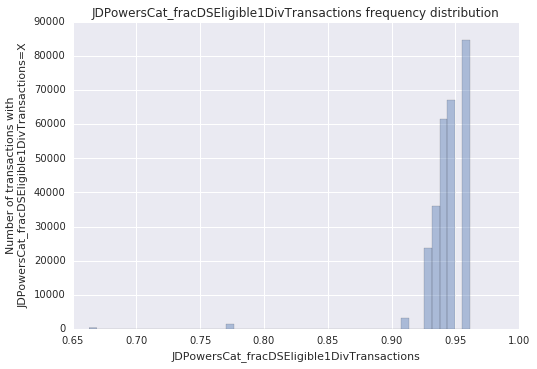

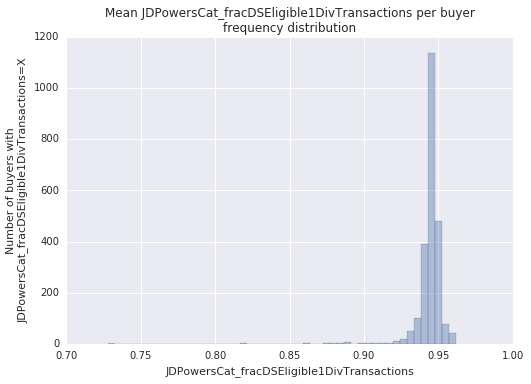

################################################################################
Feature: JDPowersCat_fracReturnedNotNullDivDSEligible1


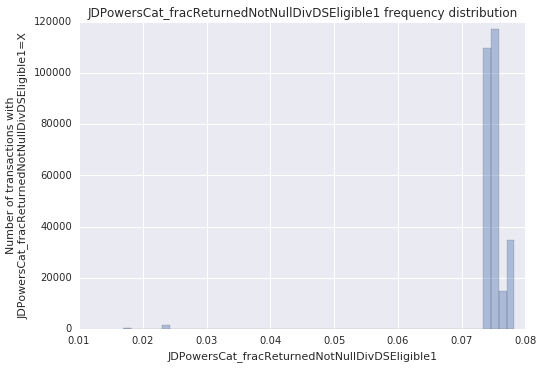

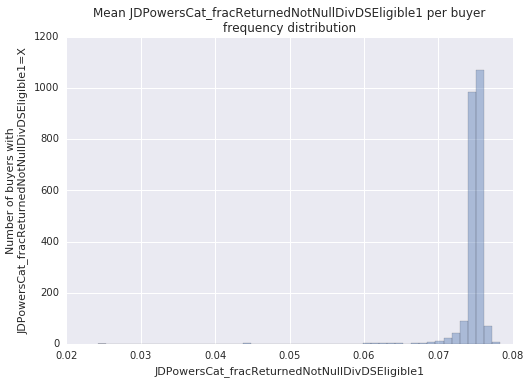

################################################################################
Feature: JDPowersCat_fracReturned1DivReturnedNotNull


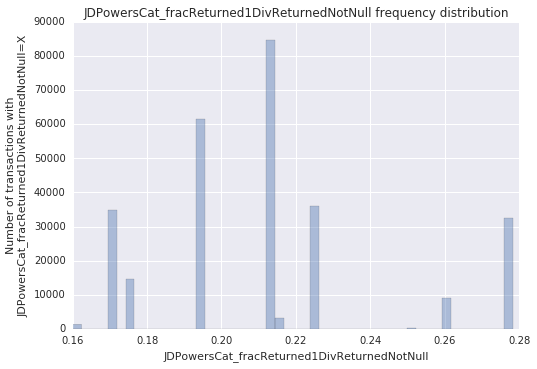

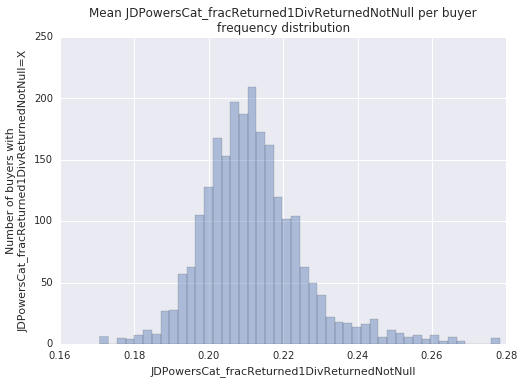

################################################################################
Feature: Returned_asm


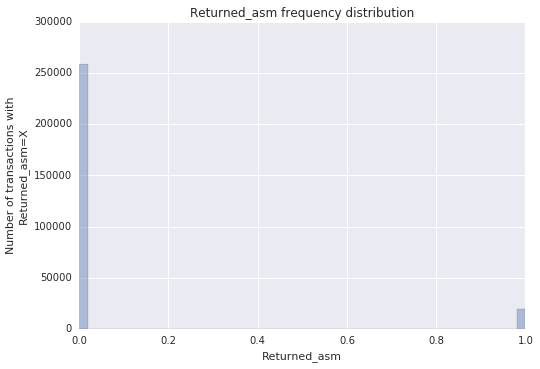

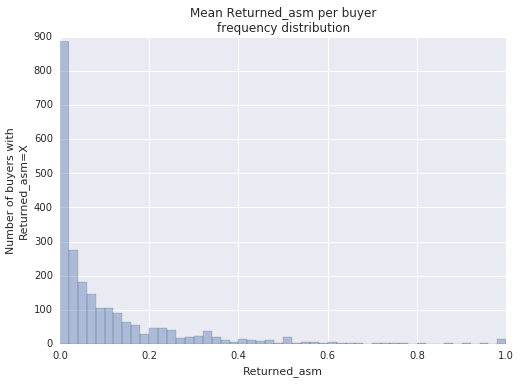

################################################################################


In [46]:
# Plot frequency distributions.
for ftr in ftrs:
    print('Feature: {ftr}'.format(ftr=ftr))
    # ...by transaction
    sns.distplot(df[ftr].values, hist=True, kde=False, norm_hist=False)
    plt.title('{ftr} frequency distribution'.format(ftr=ftr))
    plt.xlabel(ftr)
    plt.ylabel('Number of transactions with\n{ftr}=X'.format(ftr=ftr))
    plt.show()
    # ...by buyer
    sns.distplot(df[['BuyerID', ftr]].groupby(by='BuyerID').mean(), hist=True, kde=False, norm_hist=False)
    plt.title('Mean {ftr} per buyer\nfrequency distribution'.format(ftr=ftr))
    plt.xlabel(ftr)
    plt.ylabel('Number of buyers with\n{ftr}=X'.format(ftr=ftr))
    plt.show()
    print(80*'#')

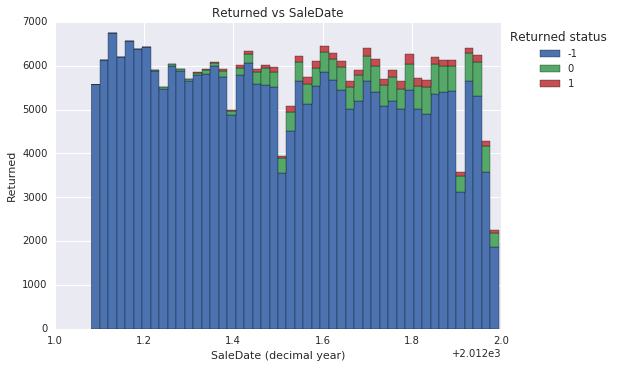

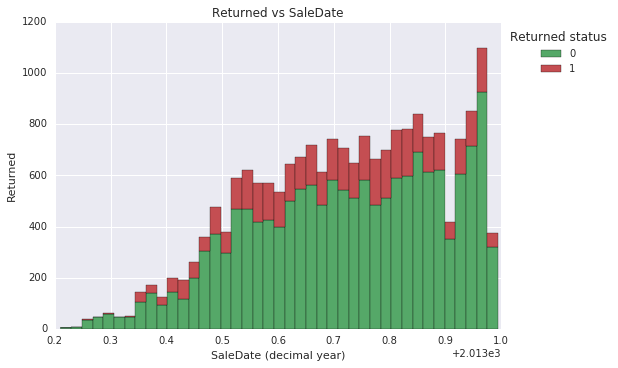

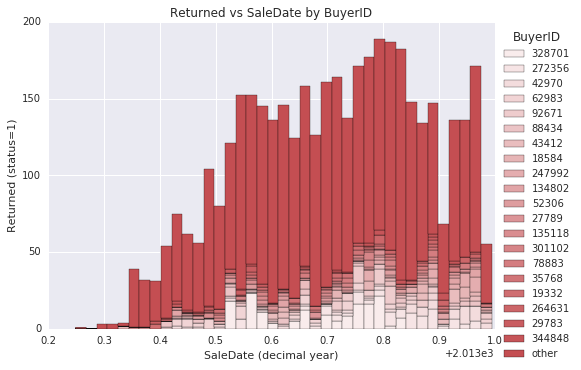

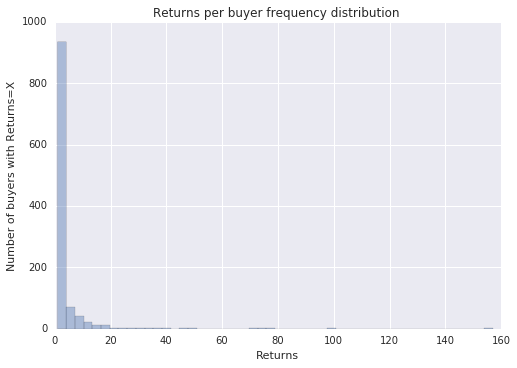

In [48]:
# Describe heuristic to identify bad dealers.

# Plot timeseries histogram of Returned vs SalesDate.
df_plot = df[['SaleDate_decyear', 'Returned']].copy()
itemized_counts = {
    ret: collections.Counter(grp['SaleDate_decyear'])
    for (ret, grp) in df_plot.groupby(by='Returned')}
itemized_counts = collections.OrderedDict(
    sorted(itemized_counts.items(), key=lambda tup: tup[0]))
keys = itemized_counts.keys()
bins = int(np.ceil((df_plot['SaleDate_decyear'].max() - df_plot['SaleDate_decyear'].min())/(1.0/52.0)))
colors = sns.color_palette(n_colors=len(keys))
plt.hist(
    [list(itemized_counts[key].elements()) for key in itemized_counts.keys()],
    bins=bins, stacked=True, rwidth=1.0, label=keys, color=colors)
plt.title('Returned vs SaleDate')
plt.xlabel('SaleDate (decimal year)')
plt.ylabel('Returned')
plt.legend(title='Returned status', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()
del df_plot

# Plot timeseries histogram of Returned (0,1) vs SalesDate.
df_plot = df.loc[df['Returned']!=-1, ['SaleDate_decyear', 'Returned']].copy()
itemized_counts = {
    ret: collections.Counter(grp['SaleDate_decyear'])
    for (ret, grp) in df_plot.groupby(by='Returned')}
itemized_counts = collections.OrderedDict(
    sorted(itemized_counts.items(), key=lambda tup: tup[0]))
keys = itemized_counts.keys()
bins = int(np.ceil((df_plot['SaleDate_decyear'].max() - df_plot['SaleDate_decyear'].min())/(1.0/52.0)))
plt.hist(
    [list(itemized_counts[key].elements()) for key in itemized_counts.keys()],
    bins=bins, stacked=True, rwidth=1.0, label=keys, color=colors[-2:])
plt.title('Returned vs SaleDate')
plt.xlabel('SaleDate (decimal year)')
plt.ylabel('Returned')
plt.legend(title='Returned status', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()
del df_plot

# Plot timeseries histogram of Returned (1) vs SalesDate by BuyerID.
df_plot = df.loc[df['Returned']==1, ['SaleDate_decyear', 'BuyerID']].copy()
top = [tup[0] for tup in collections.Counter(df_plot['BuyerID']).most_common(n=20)]
itemized_counts_all = {
    buy: collections.Counter(grp['SaleDate_decyear'])
    for (buy, grp) in df_plot.groupby(by='BuyerID')}
itemized_counts_top = {'other': collections.Counter()}
for (buyerid, counts) in itemized_counts_all.items():
    if buyerid in top:
        itemized_counts_top[buyerid] = counts
    else:
        itemized_counts_top['other'].update(counts)
itemized_counts = collections.OrderedDict(
    sorted(itemized_counts_top.items(), key=lambda tup: sum(tup[1].values()), reverse=True))
itemized_counts.move_to_end('other')
keys = itemized_counts.keys()
bins = int(np.ceil((df_plot['SaleDate_decyear'].max() - df_plot['SaleDate_decyear'].min())/(1.0/52.0)))
colors = sns.light_palette(sns.color_palette()[2], n_colors=len(keys))
plt.hist(
    [list(itemized_counts[key].elements()) for key in itemized_counts.keys()],
    bins=bins, stacked=True, rwidth=1.0, label=keys, color=colors)
plt.title('Returned vs SaleDate by BuyerID')
plt.xlabel('SaleDate (decimal year)')
plt.ylabel('Returned (status=1)')
plt.legend(title='BuyerID', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()
del df_plot

# Plot frequency distribution of Returns per BuyerID
return_counts = collections.Counter(df.loc[df['Returned']==1, 'BuyerID'].values)
sns.distplot(list(return_counts.values()), hist=True, kde=False, norm_hist=False)
plt.title('Returns per buyer frequency distribution ')
plt.xlabel('Returns')
plt.ylabel('Number of buyers with Returns=X')
plt.show()

In [ ]:
# TODO
# Determine which features are categorical and plot.
# Features are considered "categorical" if
# num_unique_feature_values < min(num_unique_id_values, num_unique_target_values)
(df_ftrs, ds_trg) = (step.s2.dfs.df_features_model, step.s2.dfs.ds_target_model)
(nuniq_uid, nuniq_trg) = (len(df_ftrs['SERIALNO'].unique()), len(ds_trg.unique()))
nuniq_min = min(nuniq_uid, nuniq_trg)
(ftr_nuniq, nuniq_nftrs, cat_ftrs) = (dict(), collections.defaultdict(int), list())
for ftr in df_ftrs.columns:
    ftr_nuniq[ftr] = len(df_ftrs[ftr].unique())
for (ftr, nuniq) in ftr_nuniq.items():
    nuniq_nftrs[nuniq] += 1
    if 1 < nuniq < nuniq_min:
        cat_ftrs.append(ftr)
nuniq_nftrs = np.asarray(sorted(nuniq_nftrs.items()))
tfmask = np.logical_and(1 < nuniq_nftrs[:, 0], nuniq_nftrs[:, 0] < nuniq_min)
nuniq_nftrs_cat = nuniq_nftrs[tfmask]
if not np.sum(nuniq_nftrs_cat[:, 1]) == len(cat_ftrs):
    raise AssertionError(
        ("Program error. The tallies of categorical features do not match.\n" +
         "Required: np.sum(nuniq_nftrs_cat[:, 1]) == len(cat_ftrs)\n" +
         "Given: {lhs} == {rhs}").format(
            lhs=np.sum(nuniq_nftrs_cat[:, 1]), rhs=len(cat_ftrs)))
print(
    ("Features are considered 'categorical' if num_unique_feature_values\n" +
     "    < min(num_unique_id_values ({uid}), num_unique_target_values ({trg}))\n" +
     "    = min({nuid}, {ntrg}) = {nmin}\n" +
     "Percent of features that are categorical: {frac:.1%}").format(
        uid='SERIALNO', trg=step.s0.dfs.ds_target_model.name,
        nuid=nuniq_uid, ntrg=nuniq_trg, nmin=nuniq_min,
        frac=len(cat_ftrs)/len(df_ftrs.columns)))
plt.semilogx(
    nuniq_nftrs[:, 0], nuniq_nftrs[:, 1], marker='.', linestyle='-',
    color=sns.color_palette()[0], label='features')
plt.semilogx(
    nuniq_nftrs_cat[:, 0], nuniq_nftrs_cat[:, 1], marker='o', linestyle='',
    color=sns.color_palette('dark')[0], label='categorical features')
plt.axvline(
    x=len(step.s2.dfs.ds_target_model.unique()),
    color=sns.color_palette()[1], label=step.s2.dfs.ds_target_model.name)
plt.axvline(
    x=len(step.s2.dfs.df_features_model['SERIALNO'].unique()),
    color=sns.color_palette()[2], label='SERIALNO')
plt.title("Number of feature vs number of unique values per feature")
plt.xlabel("Number of unique values per feature")
plt.ylabel("Number of features")
plt.legend(loc='upper center')
plt.show()